   <h1 align="center"> <font color='#880B03'> Notebook 2: Analyse détaillée </font> <h1> 

   <h1 align="center"> <font color='#880B03'> Introduction </font> <h1> 

<div class="alert alert-block alert-info">
    <b></b> Bonjour,
Pour rappel je suis arrivé récemment chez Lapage en tant que consultant data analyste, j’interviens suite à un besoin :
Lapage est une grande librairie généraliste réputée, à l’origine elle était une librairie physique avec plusieurs points de vente mais face à son succès elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne. Lapage souhaite faire une analyse après ses deux ans d’exercice. 
    </div>

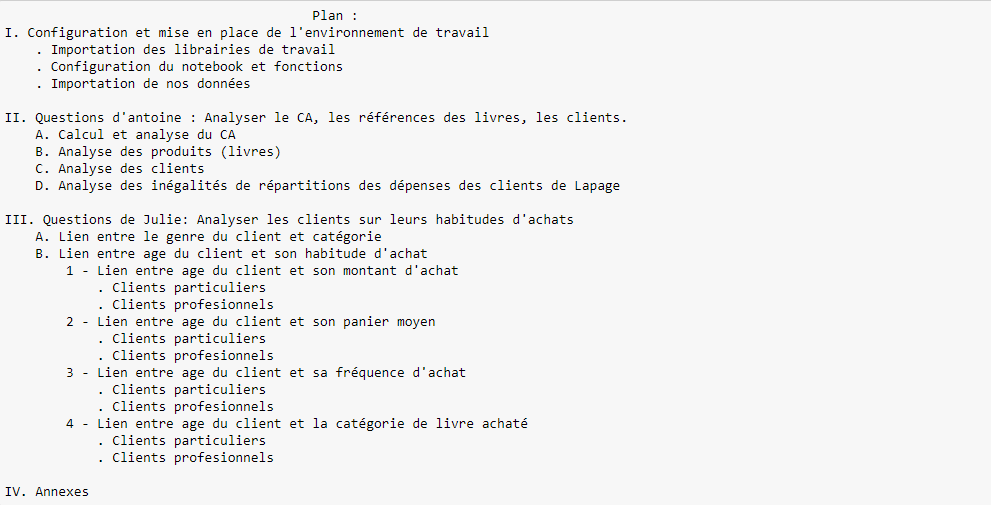

<h1 align="center"> <font color='#880B03'>I. Configuration et mise en place de l'environnement de travail</font>  <h1>

<h4 align="center"> <font color='#880B03'>Importation des librairies de travail</font>  <h4> 

In [1]:
# Importation de la librairie Pandas et numpy.
import pandas as pd
import numpy as np

# Importation eviter les messages rouges d'erreurs.
import warnings
warnings.filterwarnings("ignore")

# Importation datetime.
import datetime as dt
from datetime import date

# Import librairies pour la visualisation.
import matplotlib.pyplot as plt
import seaborn as sns

<h4 align="center"> <font color='#880B03'> Configuration du notebook et fonctions </font> <h4> 

In [ ]:
# Configuration du display options afficher toutes les lignes
pd.set_option("display.max_rows", None)

<h4 align="center"> <font color='#880B03'> Importation de nos données </font> <h4> 

In [2]:
# Importation de la table finale.

df = pd.read_csv('C:/Users/alex/Desktop/Projet_6/données/Table.csv')

In [3]:
df.head()

product_id                        date session_id client_id  Annee_Mois sex  \
0     0_1518  2022-05-20 13:21:29.043970   s_211425     c_103  2022-05-01   f   
1     0_1518  2021-07-20 13:21:29.043970    s_64849     c_103  2021-07-01   f   
2     0_1518  2022-08-20 13:21:29.043970   s_255965     c_103  2022-08-01   f   
3     0_1518  2021-05-09 11:52:55.100386    s_32104    c_6714  2021-05-01   f   
4     0_1518  2022-05-30 01:17:07.487046   s_216118    c_6714  2022-05-01   f   

   birth  age categorie_age  price  categ  total_achats  Nbr_Transaction  \
0   1986   37      thirties   4.18      0       2288.49              195   
1   1986   37      thirties   4.18      0       2288.49              195   
2   1986   37      thirties   4.18      0       2288.49              195   
3   1968   55       fifties   4.18      0     153669.18             9187   
4   1968   55       fifties   4.18      0     153669.18             9187   

   Panier_Moyen  
0         11.74  
1         11.74  
2         11.74  
3         16.73  
4         16.73

<h1 align="center"> <font color='#880B03'>II. Questions Antoine : Analyser le CA, les références des livres, les clients </font>  <h1>    

<h2 align="center"> <font color='#880B03'> A. Calcul et analyse du CA </font>  <h2>    

In [4]:
# Calcul le ca global = somme de tous les achats ici 'price'.

print("le chiffre d'affaire total est de", round(df['price'].sum(),2) ,'euros')

le chiffre d'affaire total est de 11856316.59 euros


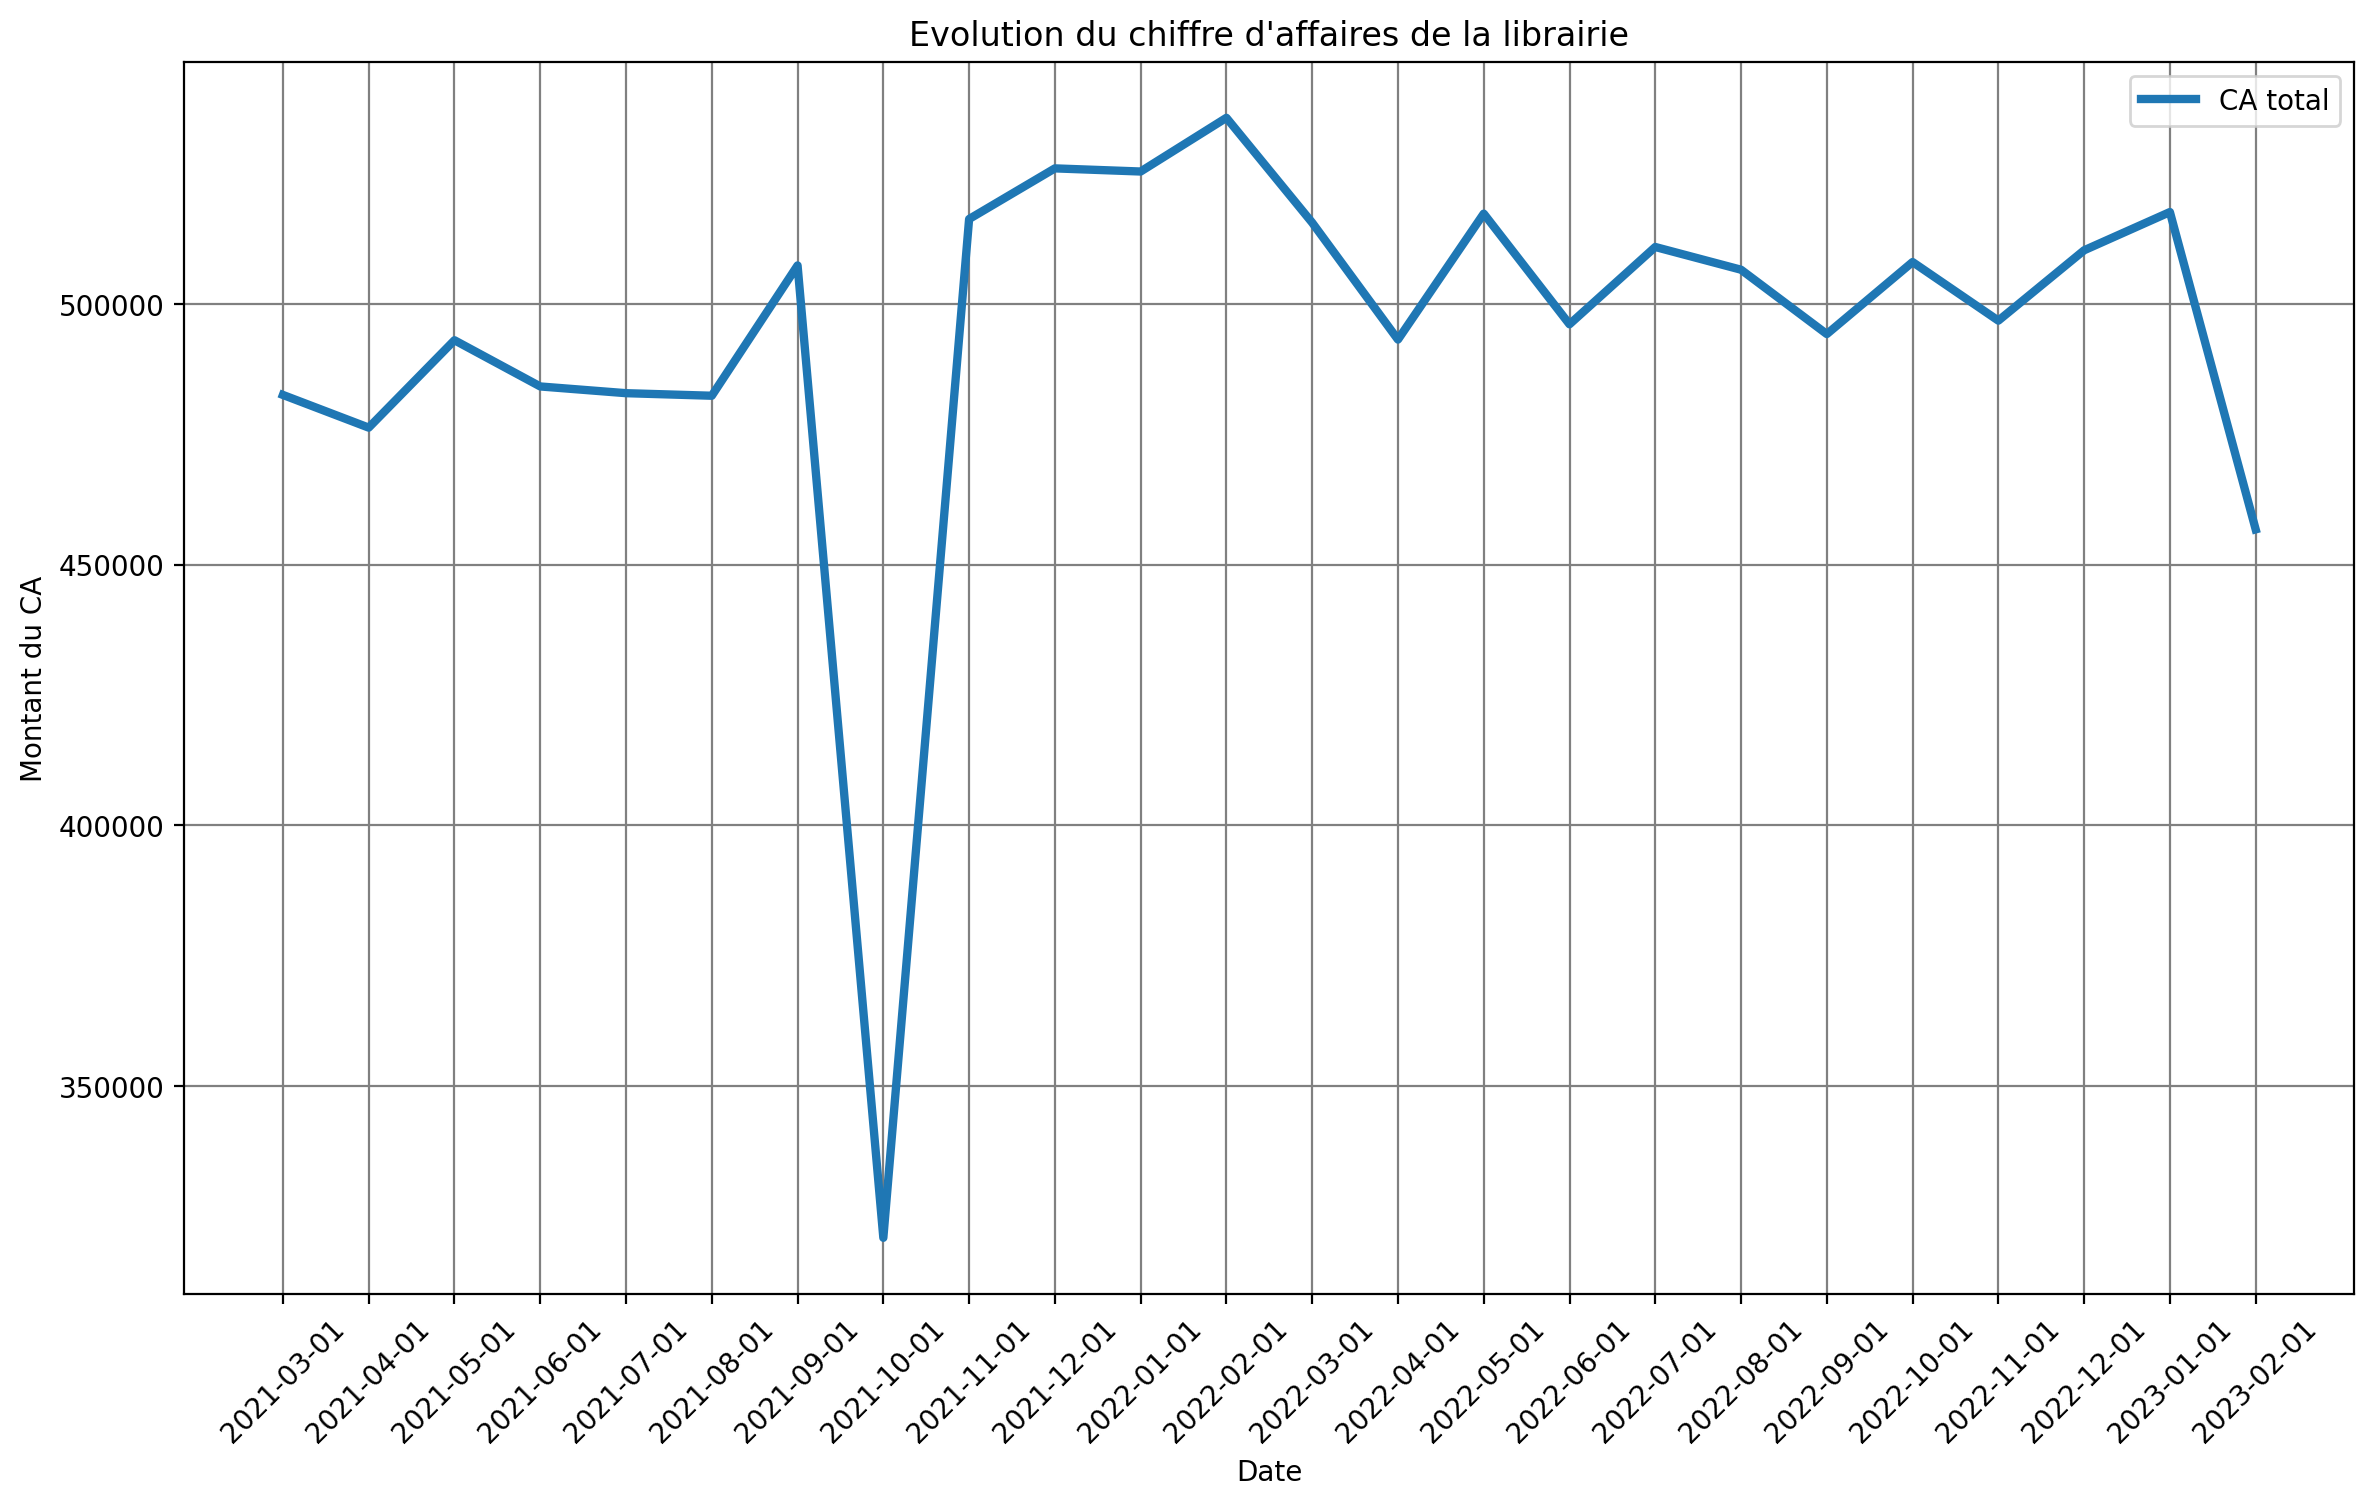

In [5]:
# On regarde l'évolution du CA depuis mars 2021 (sur deux ans de recettes).

df_ca = pd.DataFrame(df.groupby(by=['Annee_Mois']).sum()['price']).reset_index()

# Graphique:
plt.figure(figsize=(14,8), dpi=200)
plt.grid(color='gray', )
plt.title("Evolution du chiffre d'affaires de la librairie")
plt.xlabel("Date")
plt.ylabel("Montant du CA")
plt.xticks(rotation=45)

plt.plot(df_ca['Annee_Mois'], df_ca["price"], label='CA total', linewidth=3)
plt.legend()

In [6]:
# Evolution du CA par catégorie de livre acheté.

# Création de 3 DF 1 pour chaque categorie et groupby par date, operation d'agrégation sum de price.
df_categ0 = df.loc[df['categ']==0,:]
df_Evol_CA_categ0 = pd.DataFrame(df_categ0.groupby(by=['Annee_Mois']).sum()['price']).reset_index()

df_categ1 = df.loc[df['categ']==1,:]
df_Evol_CA_categ1 = pd.DataFrame(df_categ1.groupby(by=['Annee_Mois']).sum()['price']).reset_index()

df_categ2 = df.loc[df['categ']==2,:]
df_Evol_CA_categ2 = pd.DataFrame(df_categ2.groupby(by=['Annee_Mois']).sum()['price']).reset_index()

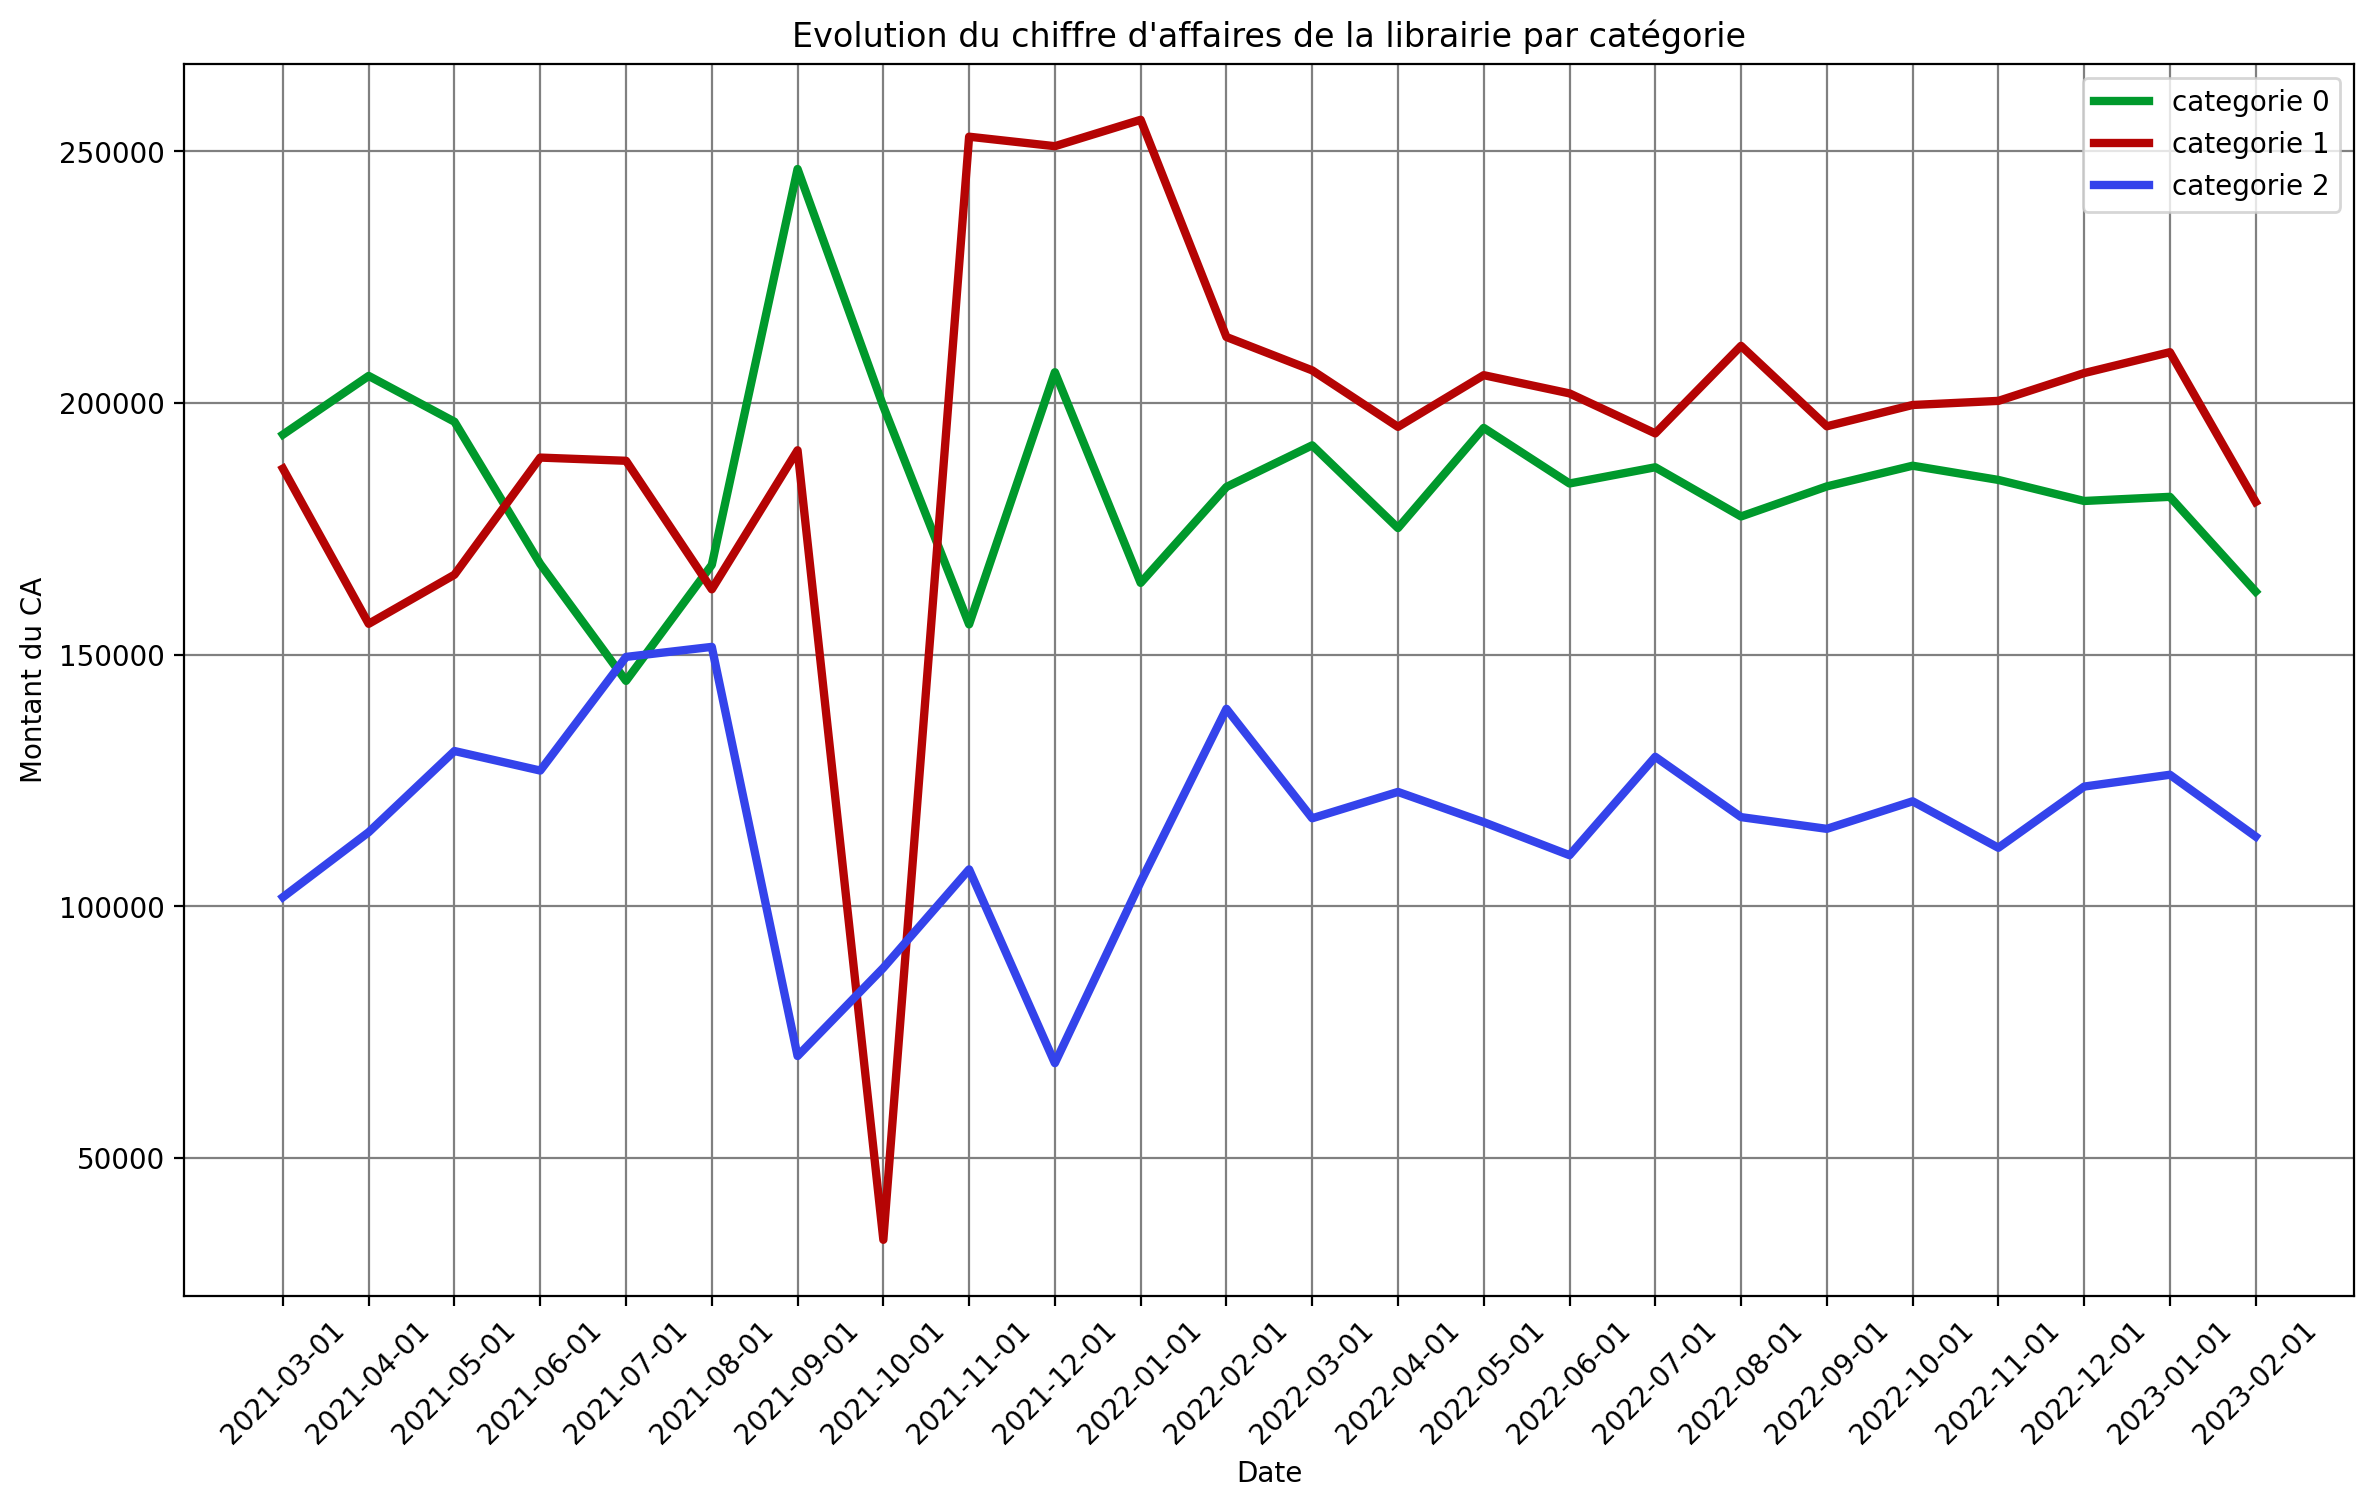

In [7]:
# Affiche l'évolution du CA par catégorie de livre acheté.

# Change la palette de couleur pour différencier les catégories.
colors_categ = ["#00992C","#b50404", "#3443eb"]
sns.set_palette(sns.color_palette(colors_categ))

# Graphique:
plt.figure(figsize=(14,8), dpi=200)
plt.grid(color='gray', )
plt.title("Evolution du chiffre d'affaires de la librairie par catégorie")
plt.xlabel("Date")
plt.ylabel("Montant du CA")
plt.xticks(rotation=45)

plt.plot(df_Evol_CA_categ0['Annee_Mois'], df_Evol_CA_categ0["price"], label='categorie 0', linewidth=3)
plt.plot(df_Evol_CA_categ1['Annee_Mois'], df_Evol_CA_categ1["price"], label='categorie 1', linewidth=3)
plt.plot(df_Evol_CA_categ2['Annee_Mois'], df_Evol_CA_categ2["price"], label='categorie 2', linewidth=3)
plt.legend()



In [8]:
# On sort toutes nos données sur le moi d'octobre 2021 pour les livres de la catégorie 1 vendus.

df_Evol_CA_categ1.loc[df_Evol_CA_categ1['Annee_Mois']=='2021-10-01',:]

Annee_Mois     price
7  2021-10-01  33762.32

 > *On a des valeurs, il y a bien eu des ventes.*

In [9]:
# On affiche ces transactions.

df.loc[(df['Annee_Mois']=='2021-10-01') &  (df['categ']==1),:]

product_id                        date session_id client_id  \
4168        1_379  2021-10-01 13:54:31.583833    s_98448    c_4958   
4307        1_379  2021-10-31 04:36:37.896440   s_112575    c_1104   
4376        1_379  2021-10-30 00:48:57.461482   s_112045    c_8058   
4546        1_379  2021-10-30 23:04:52.756570   s_112459    c_7621   
4763        1_379  2021-10-30 18:17:05.750178   s_112372     c_699   
...           ...                         ...        ...       ...   
675082      1_372  2021-10-31 15:59:53.786596   s_112795     c_639   
675368      1_469  2021-10-01 08:34:35.747969    s_98332    c_5765   
675558      1_182  2021-10-28 19:32:25.094285   s_111456    c_3878   
675568      1_182  2021-10-28 17:43:23.275449   s_111417    c_1926   
676177      1_513  2021-10-28 15:34:51.834512   s_111379    c_3325   

        Annee_Mois sex  birth  age categorie_age  price  categ  total_achats  \
4168    2021-10-01   m   1999   24      twenties  26.99      1     289760.34   
4307    2021-10-01   f   1974   49      fourties  26.99      1       2648.73   
4376    2021-10-01   m   1991   32      thirties  26.99      1       2174.36   
4546    2021-10-01   m   1957   66       sixties  26.99      1        474.45   
4763    2021-10-01   f   1986   37      thirties  26.99      1       4200.07   
...            ...  ..    ...  ...           ...    ...    ...           ...   
675082  2021-10-01   m   1981   42      fourties  30.12      1       1303.01   
675368  2021-10-01   m   1952   71     seventies   5.99      1        783.96   
675558  2021-10-01   m   1988   35      thirties   7.71      1       2795.81   
675568  2021-10-01   f   2003   20      twenties   7.71      1        843.55   
676177  2021-10-01   m   1986   37      thirties  35.99      1       2819.89   

        Nbr_Transaction  Panier_Moyen  
4168               5195         55.78  
4307                211         12.55  
4376                163         13.34  
4546                 27         17.57  
4763                290         14.48  
...                 ...           ...  
675082               94         13.86  
675368               51         15.37  
675558              206         13.57  
675568               26         32.44  
676177              200         14.10  

[1666 rows x 14 columns]

In [10]:
# On affiche toutes les dates du mois d'octobre 2021 ou nous avons des transactions.

df_octobre_categ1 = df[(df['Annee_Mois']=='2021-10-01') & (df['categ']==1)]
df_octobre_categ1['date'] = pd.to_datetime(df_octobre_categ1['date'])
df_octobre_categ1['date'] = df_octobre_categ1['date'].dt.strftime('%Y/%m/%d')
df_octobre_categ1['date'].unique()

# df[(df['date']>='2021-10-02') & (df['date']<='2021-10-27') & (df['categ']==1)]

array(['2021/10/01', '2021/10/31', '2021/10/30', '2021/10/28',
       '2021/10/29'], dtype=object)

 > *Nous avons que 5 jours d'historisation le mois d'octobre de l'année 2021 de la catégorie 1. Nous partons de l'hypothèse d'une perte de donnée sur les jours de ce mois-ci.*

In [11]:
# Nous supprimons toutes les transactions du moi d'octbre pour toutes catégories confondues pour éviter un quelconque biais.

longueur_df_avec_octobre = len(df)
df = df.drop(df[df['Annee_Mois']== '2021-10-01'].index)
print("la suprression du mois d'octobre 2021 correspond à ", round((((longueur_df_avec_octobre-len(df))*100) / longueur_df_avec_octobre), 2),'% du dataset')

la suprression du mois d'octobre 2021 correspond à  3.18 % du dataset


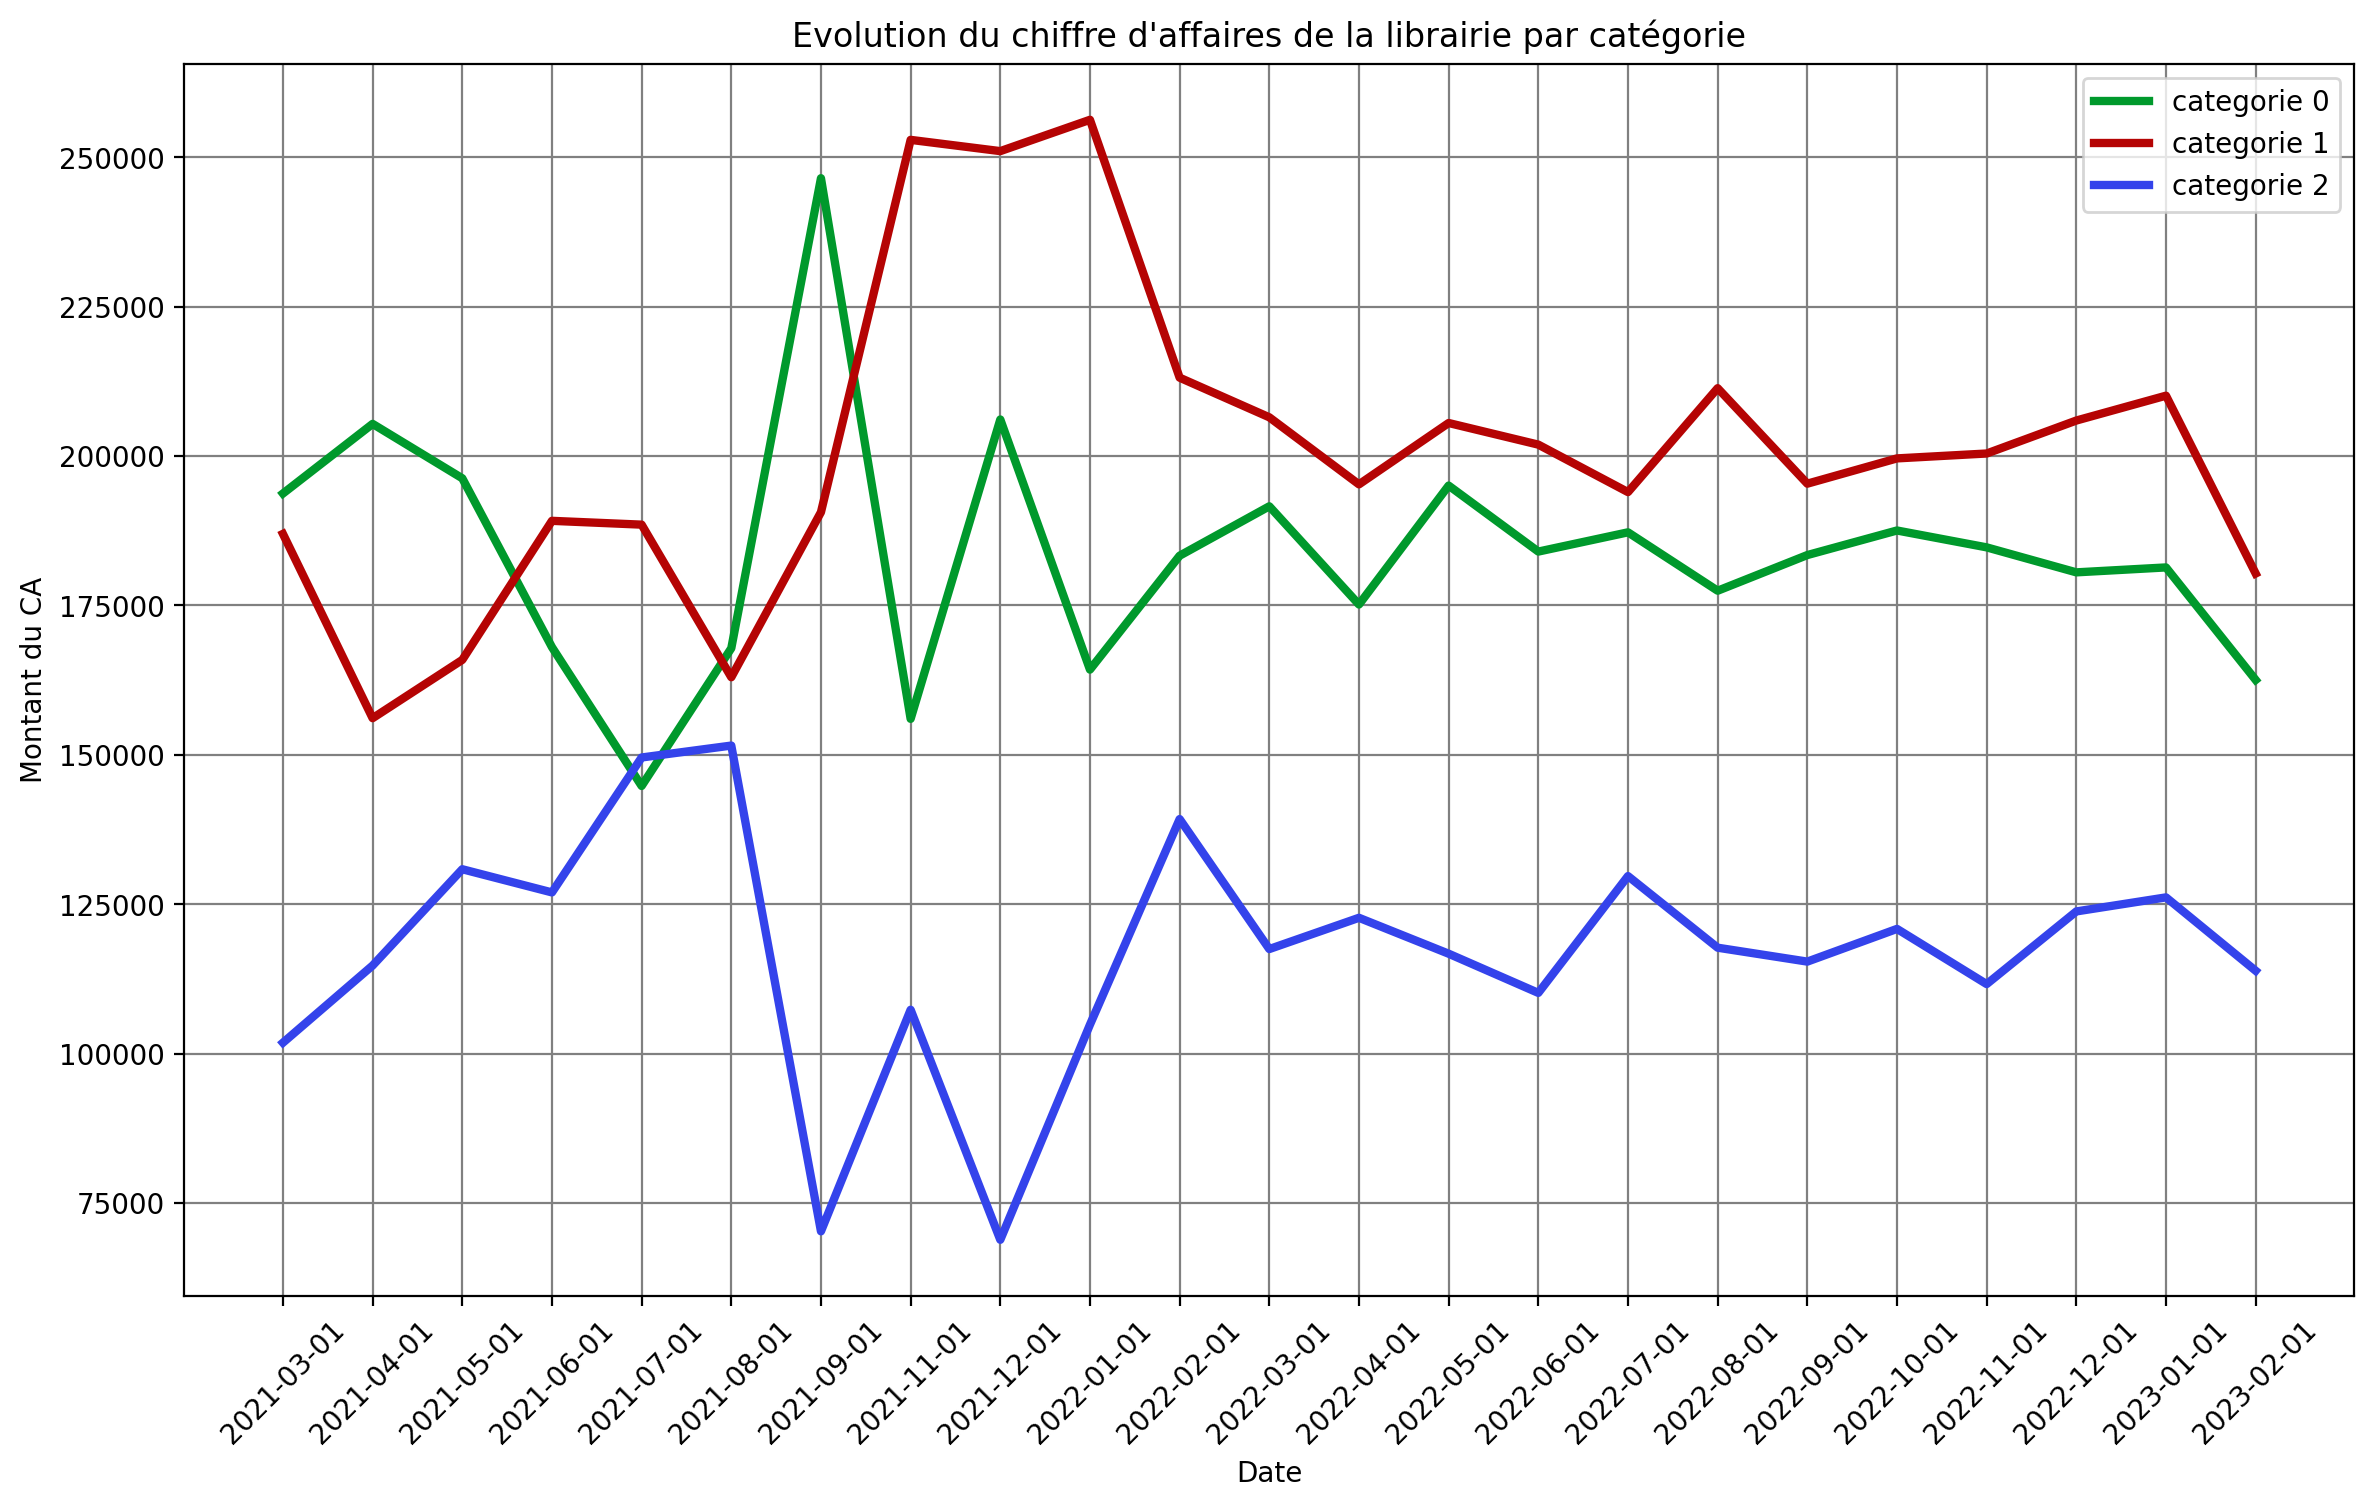

In [12]:
# On va récréer nos 3 DF comme précédemment mais cette fois-ci sans le moi d'octbre 2021.

df_categ0 = df.loc[df['categ']==0,:]
df_Evol_CA_categ0 = pd.DataFrame(df_categ0.groupby(by=['Annee_Mois']).sum()['price']).reset_index()

df_categ1 = df.loc[df['categ']==1,:]
df_Evol_CA_categ1 = pd.DataFrame(df_categ1.groupby(by=['Annee_Mois']).sum()['price']).reset_index()

df_categ2 = df.loc[df['categ']==2,:]
df_Evol_CA_categ2 = pd.DataFrame(df_categ2.groupby(by=['Annee_Mois']).sum()['price']).reset_index()

# Graphique:
plt.figure(figsize=(14,8), dpi=200)
plt.grid(color='gray', )
plt.title("Evolution du chiffre d'affaires de la librairie par catégorie")
plt.xlabel("Date")
plt.ylabel("Montant du CA")
plt.xticks(rotation=45)

plt.plot(df_Evol_CA_categ0['Annee_Mois'], df_Evol_CA_categ0["price"], label='categorie 0', linewidth=3)
plt.plot(df_Evol_CA_categ1['Annee_Mois'], df_Evol_CA_categ1["price"], label='categorie 1', linewidth=3)
plt.plot(df_Evol_CA_categ2['Annee_Mois'], df_Evol_CA_categ2["price"], label='categorie 2', linewidth=3)
plt.legend()

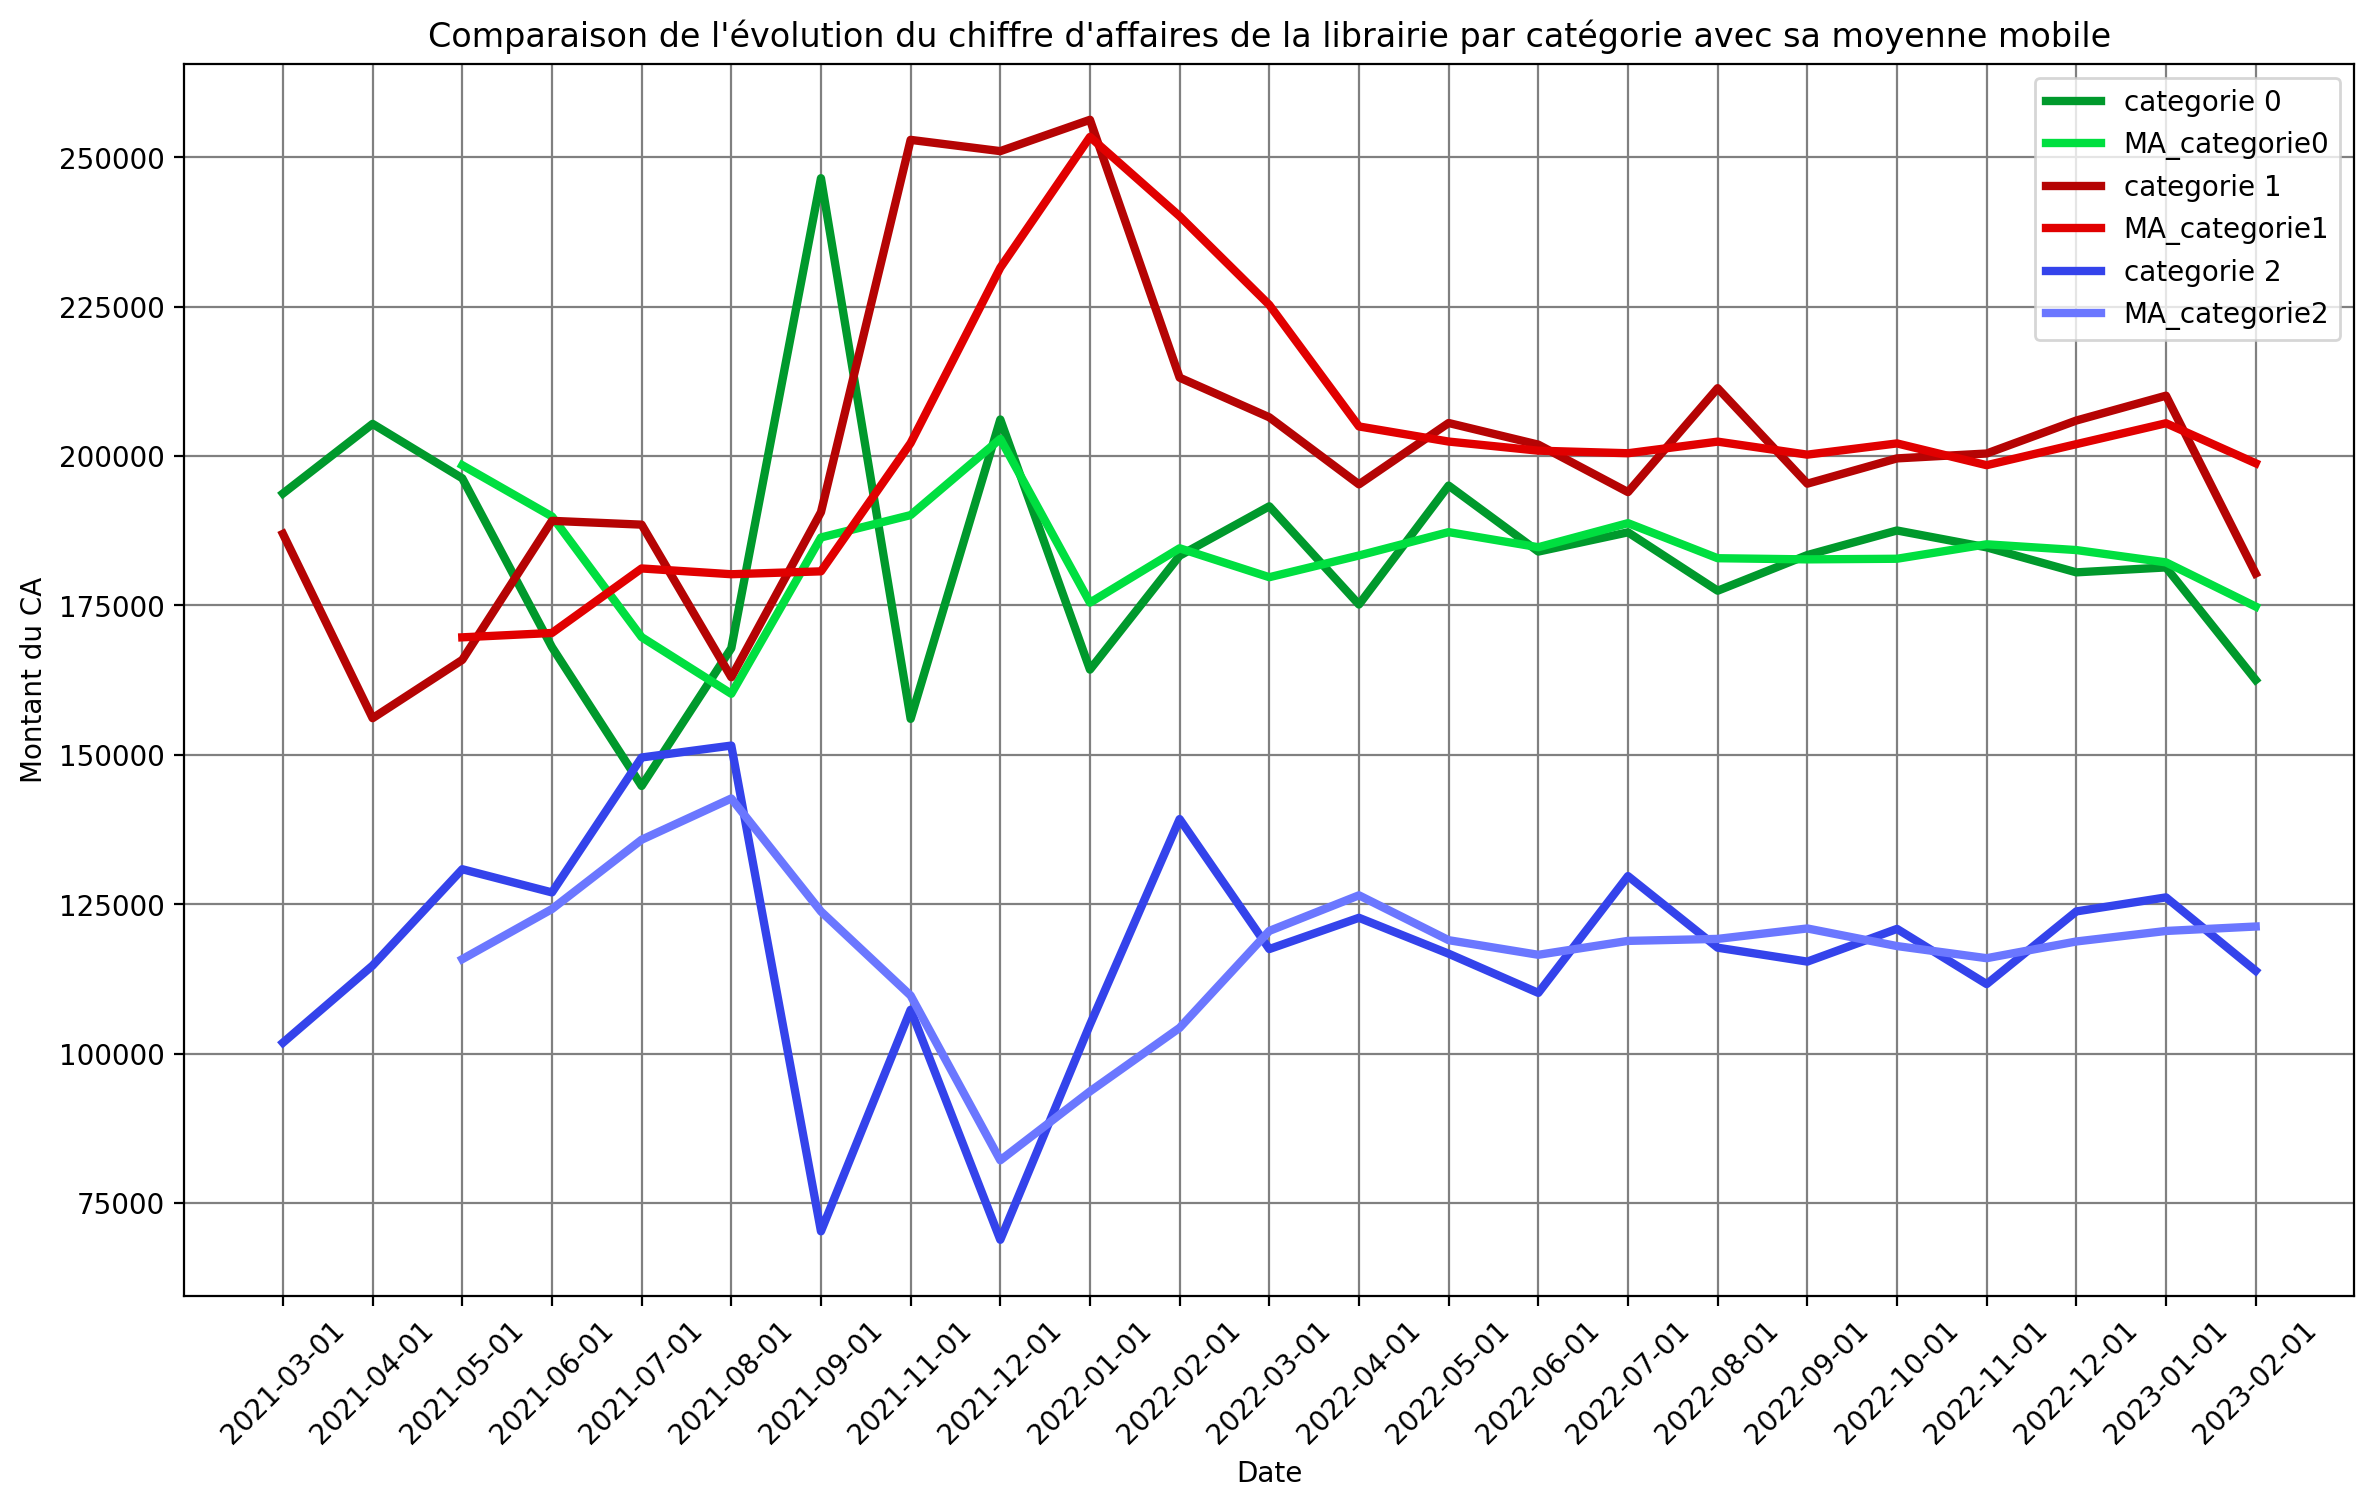

In [13]:
# Moyenne mobile sur les 2 derniers mois. 

# On va récréer nos 3 DF comme précedemment mais cette fois ci avec une moyenne mobile de 2 mois de ces dernières.
df_categ0 = df.loc[df['categ']==0,:]
df_Evol_CA_categ0['price_moving_average'] = df_Evol_CA_categ0['price'].rolling(window=3).mean()

df_categ1 = df.loc[df['categ']==1,:]
df_Evol_CA_categ1['price_moving_average'] = df_Evol_CA_categ1['price'].rolling(window=3).mean()

df_categ2 = df.loc[df['categ']==2,:]
df_Evol_CA_categ2['price_moving_average'] = df_Evol_CA_categ2['price'].rolling(window=3).mean()


# Graphique
plt.figure(figsize=(14,8), dpi=200)
plt.grid(color='gray', )
plt.title("Comparaison de l'évolution du chiffre d'affaires de la librairie par catégorie avec sa moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Montant du CA")
plt.xticks(rotation=45)

plt.plot(df_Evol_CA_categ0['Annee_Mois'], df_Evol_CA_categ0["price"], label='categorie 0', linewidth=3, c='#00992C')
plt.plot(df_Evol_CA_categ0['Annee_Mois'], df_Evol_CA_categ0['price_moving_average'], label='MA_categorie0', linewidth=3, c='#00DF40')

plt.plot(df_Evol_CA_categ1['Annee_Mois'], df_Evol_CA_categ1["price"], label='categorie 1', linewidth=3, c='#b50404')
plt.plot(df_Evol_CA_categ1['Annee_Mois'], df_Evol_CA_categ1['price_moving_average'], label='MA_categorie1', linewidth=3, c='#E10000')

plt.plot(df_Evol_CA_categ2['Annee_Mois'], df_Evol_CA_categ2["price"], label='categorie 2', linewidth=3, c='#3443eb')
plt.plot(df_Evol_CA_categ2['Annee_Mois'], df_Evol_CA_categ2['price_moving_average'], label='MA_categorie2', linewidth=3, c='#6B77FF')

plt.legend()


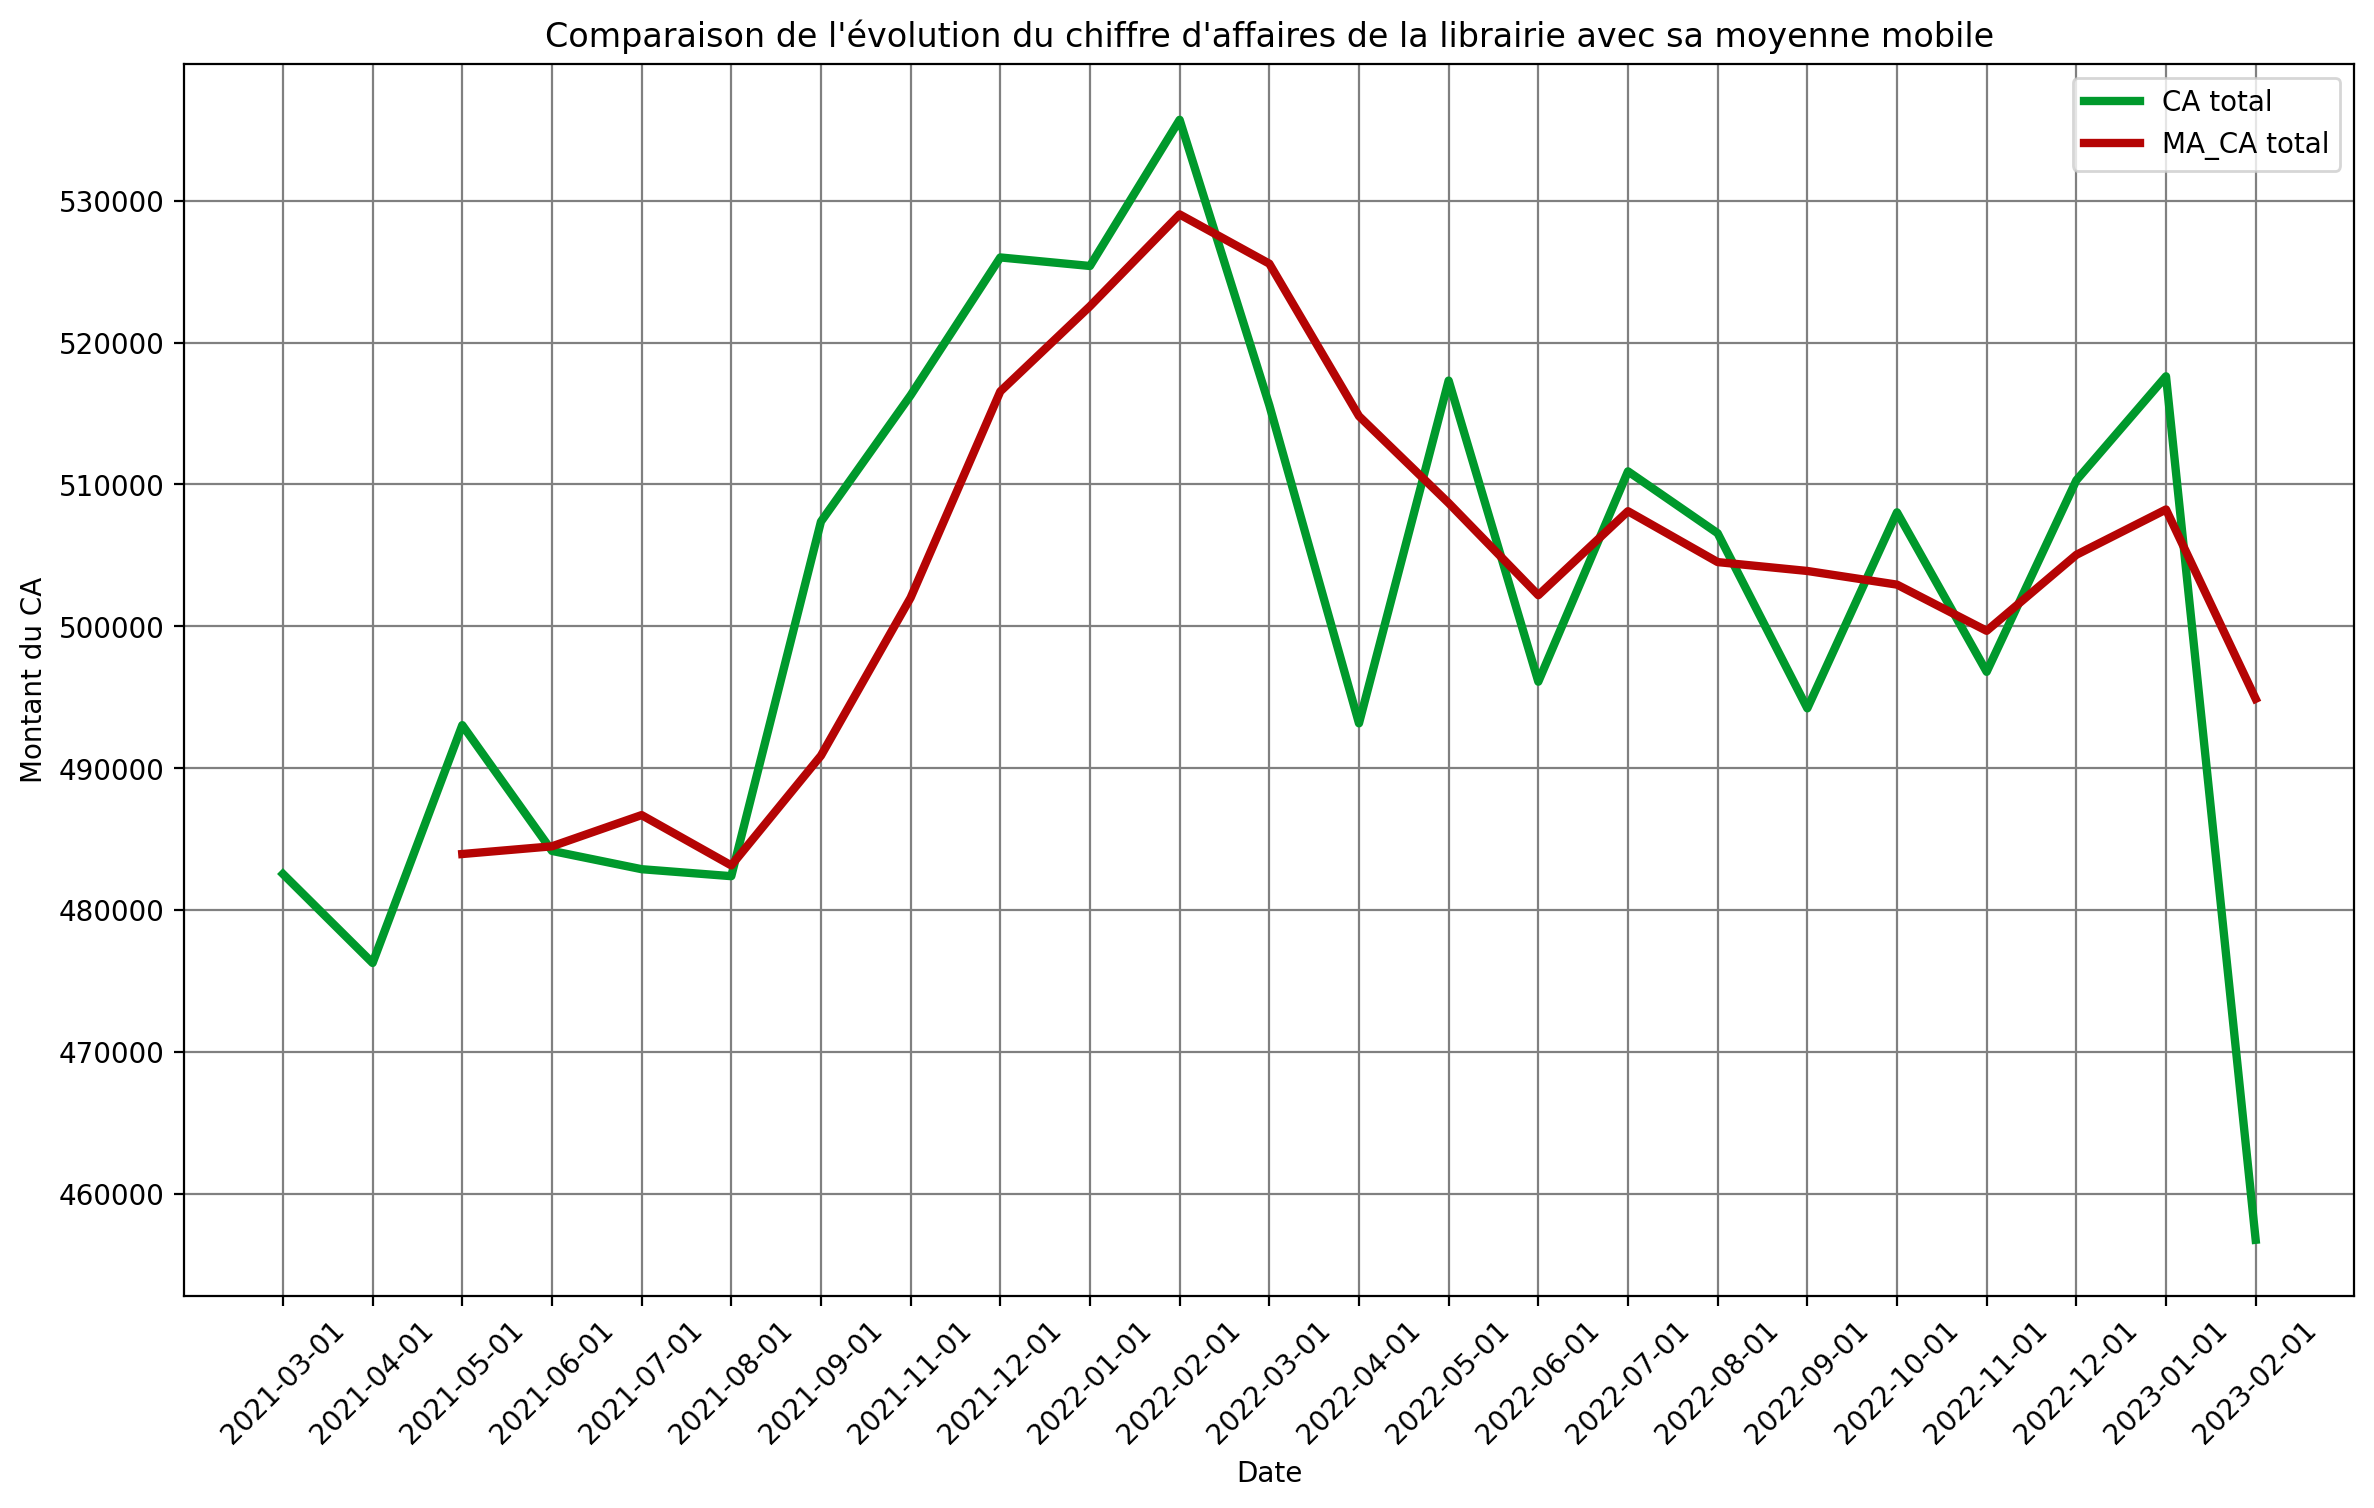

In [14]:
# Moyenne mobile sur les 2 derniers mois. 

# On recréer notre df_ca car nous avons maintenant enlever le moi d'octobre 2021, 
# Et la comparer avec une moyenne mobile de 2 mois de cette dernière.
df_ca1 = pd.DataFrame(df.groupby(by=['Annee_Mois']).sum()['price']).reset_index()
df_ca1['price_moving_average'] = df_ca1['price'].rolling(window=3).mean()

# Graphique:
plt.figure(figsize=(14,8), dpi=200)
plt.grid(color='gray', )
plt.title("Comparaison de l'évolution du chiffre d'affaires de la librairie avec sa moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Montant du CA")
plt.xticks(rotation=45)

plt.plot(df_ca1['Annee_Mois'], df_ca1["price"], label='CA total', linewidth=3)
plt.plot(df_ca1['Annee_Mois'], df_ca1['price_moving_average'], label='MA_CA total', linewidth=3)

plt.legend()

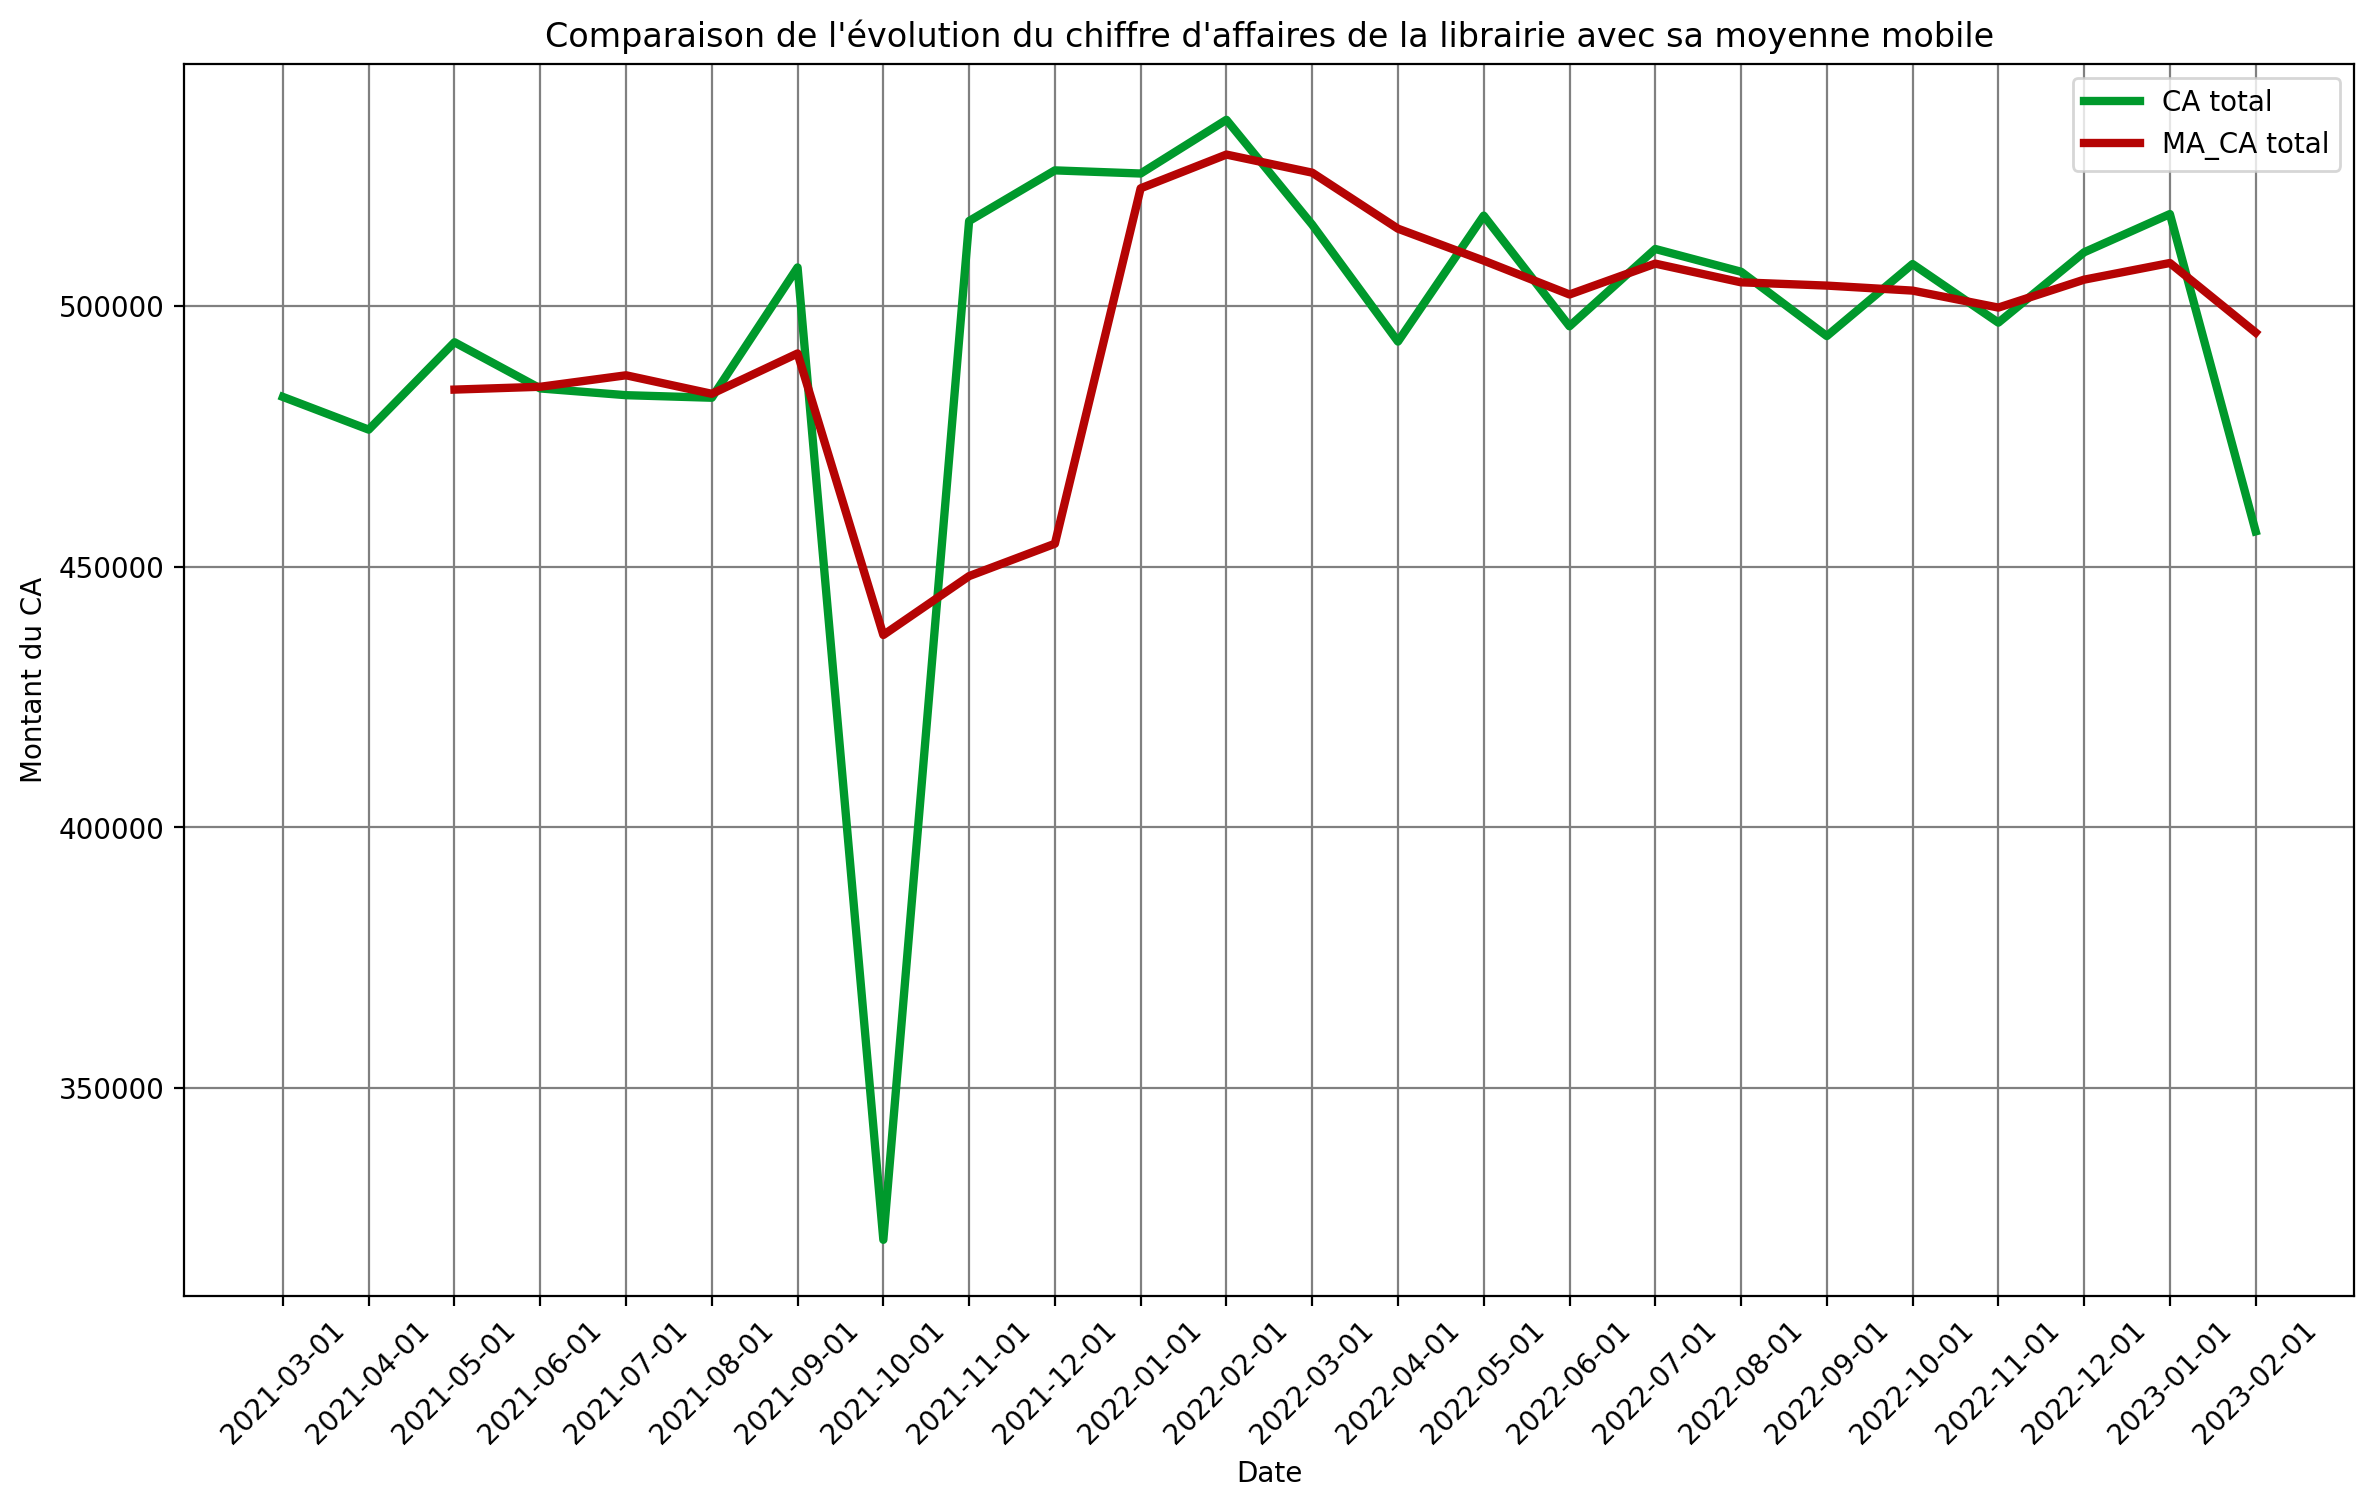

In [15]:
# Si nous avions pas supprimé le mois d'octobre 2021 nous n'aurions pas vu cette subtilité.

df_ca['price_moving_average'] = df_ca['price'].rolling(window=3).mean()

# Graphique:
plt.figure(figsize=(14,8), dpi=200)
plt.grid(color='gray', )
plt.title("Comparaison de l'évolution du chiffre d'affaires de la librairie avec sa moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Montant du CA")
plt.xticks(rotation=45)

plt.plot(df_ca['Annee_Mois'], df_ca["price"], label='CA total', linewidth=3)
plt.plot(df_ca['Annee_Mois'], df_ca['price_moving_average'], label='MA_CA total', linewidth=3)

plt.legend()

<Figure size 1200x800 with 0 Axes>

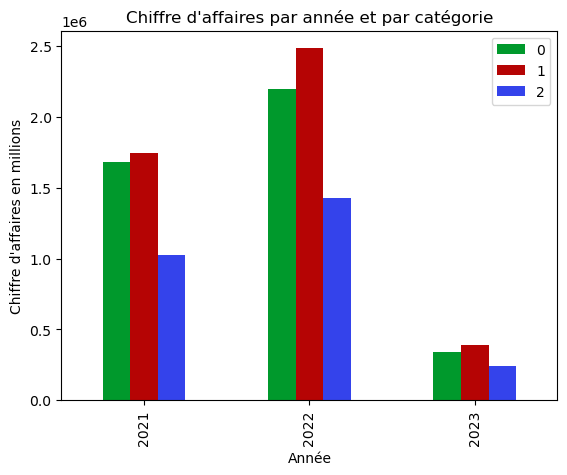

In [16]:
# Graphique sur le chiffre d'affaire par année et par catégorie.

# Création d'un df 'df_annee_categ' + ajout du champs 'Annee'.
df_annee_categ = df
df_annee_categ['date'] = pd.to_datetime(df_annee_categ['date'])
df_annee_categ['Annee'] = df_annee_categ['date'].dt.year

# Modification du df groupby par année puis par categorie.
df_annee_categ = df.groupby(['Annee', 'categ']).sum()['price'].reset_index()

# Pivot la table pour avoir en index l'année
df_annee_categ_pivot = df_annee_categ.pivot(index='Annee', columns='categ', values='price')

# Graphique:
plt.figure(figsize=(6,4), dpi=200)
df_annee_categ_pivot.plot(kind='bar')
plt.title('Chiffre d\'affaires par année et par catégorie')
plt.ylabel('Chiffre d\'affaires en millions')
plt.xlabel('Année')
plt.legend()

<h2 align="center"> <font color='#880B03'> B. Analyse des produits (livres) </font>  <h2>    

<AxesSubplot:title={'center':'TOP10 des références de livres qui rapportent le plus'}, xlabel='product_id', ylabel='price'>

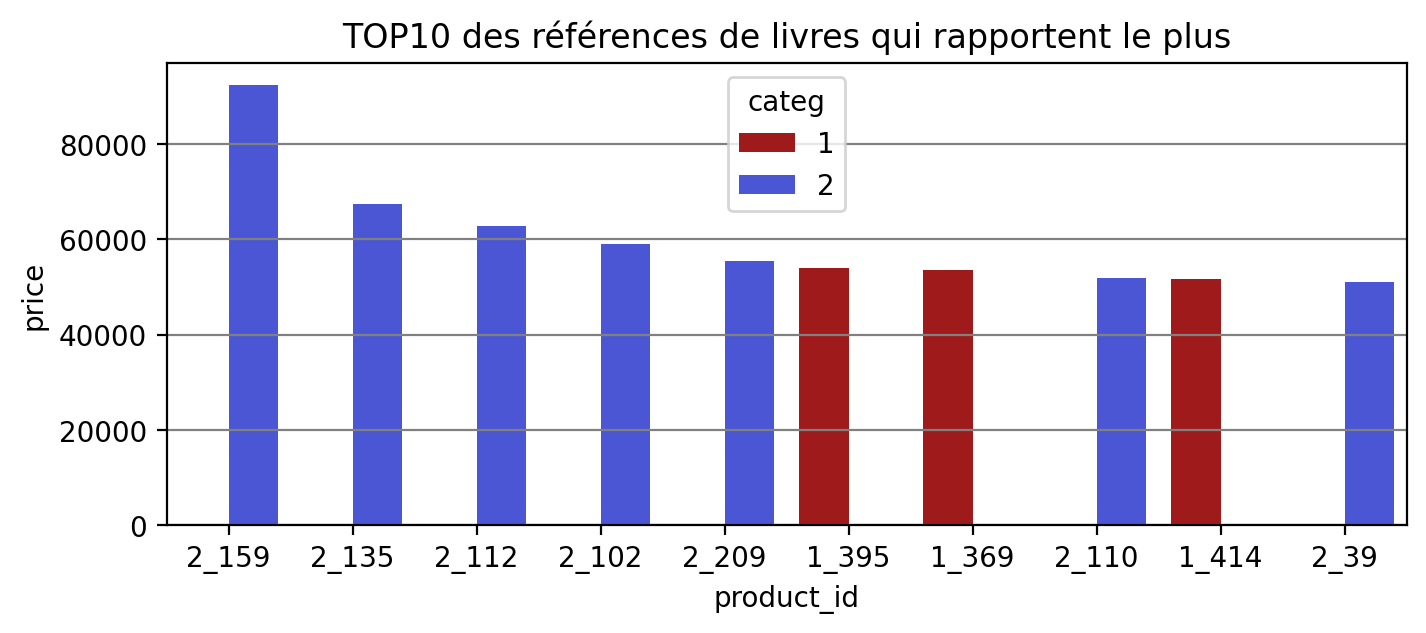

In [17]:
# TOP10 des références de livre les plus rentables.

# Création d'un df trié par produits avec la somme de ses ventes associées.
df_reference_ca = pd.DataFrame(df.groupby(by=['product_id', 'categ']).sum()['price']).reset_index()
df_reference_ca_TOP10 = df_reference_ca.sort_values('price', ascending=False).head(10)

# Graphique:
plt.figure(figsize=(8,3), dpi=200)
plt.grid(color='gray')
plt.title("TOP10 des références de livres qui rapportent le plus")
plt.xlabel("livres")
plt.ylabel("CA")
sns.barplot(data=df_reference_ca_TOP10, x="product_id", y="price", hue='categ', palette=["#b50404", "#3443eb"])

<AxesSubplot:title={'center':'TOP10 des références de livres qui rapportent le moins'}, xlabel='product_id', ylabel='price'>

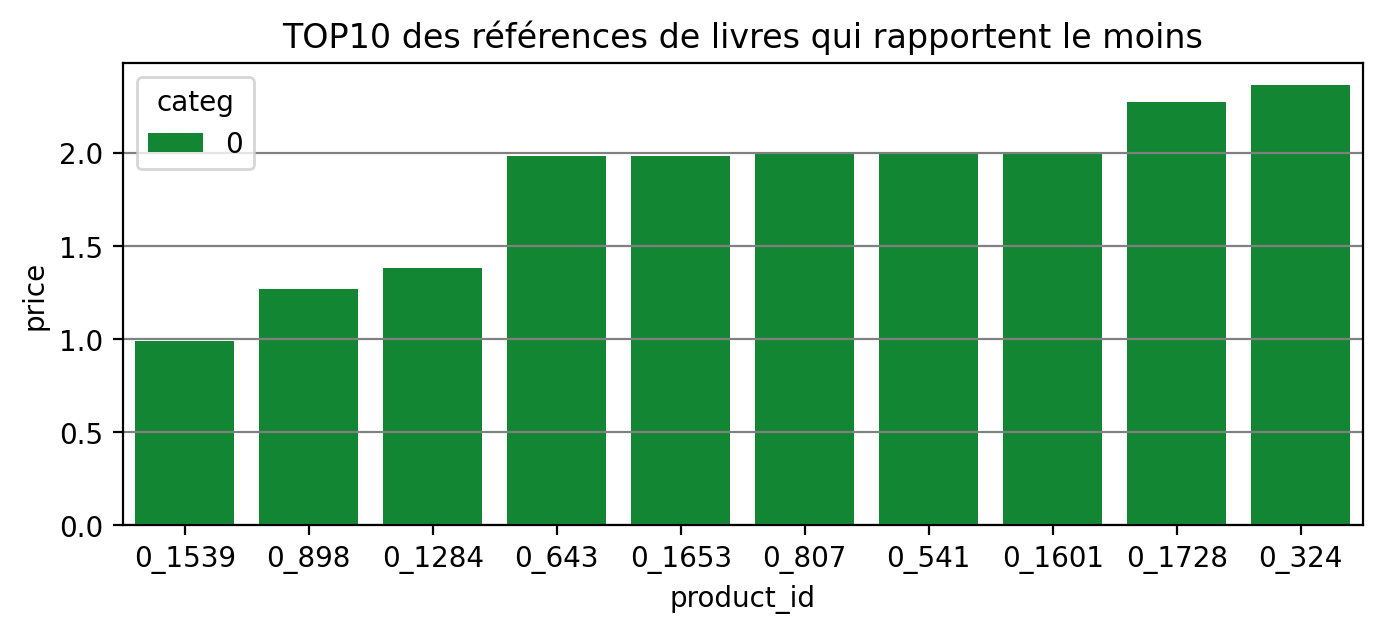

In [18]:
# TOP10 des références de livre les moins rentables.

# On change l'ordre du df calculé précedemment.
df_reference_ca_FLOP10 = df_reference_ca.sort_values('price', ascending=True).head(10)

# Graphique:
plt.figure(figsize=(8,3), dpi=200)
plt.grid(color='gray')
plt.title("TOP10 des références de livres qui rapportent le moins")
plt.xlabel("livres")
plt.ylabel("CA")
sns.barplot(data=df_reference_ca_FLOP10, x="product_id", y="price", hue='categ', palette=["#00992C"])

<AxesSubplot:title={'center':'TOP10 des références de livre les plus achetés'}, xlabel='product_id', ylabel='price'>

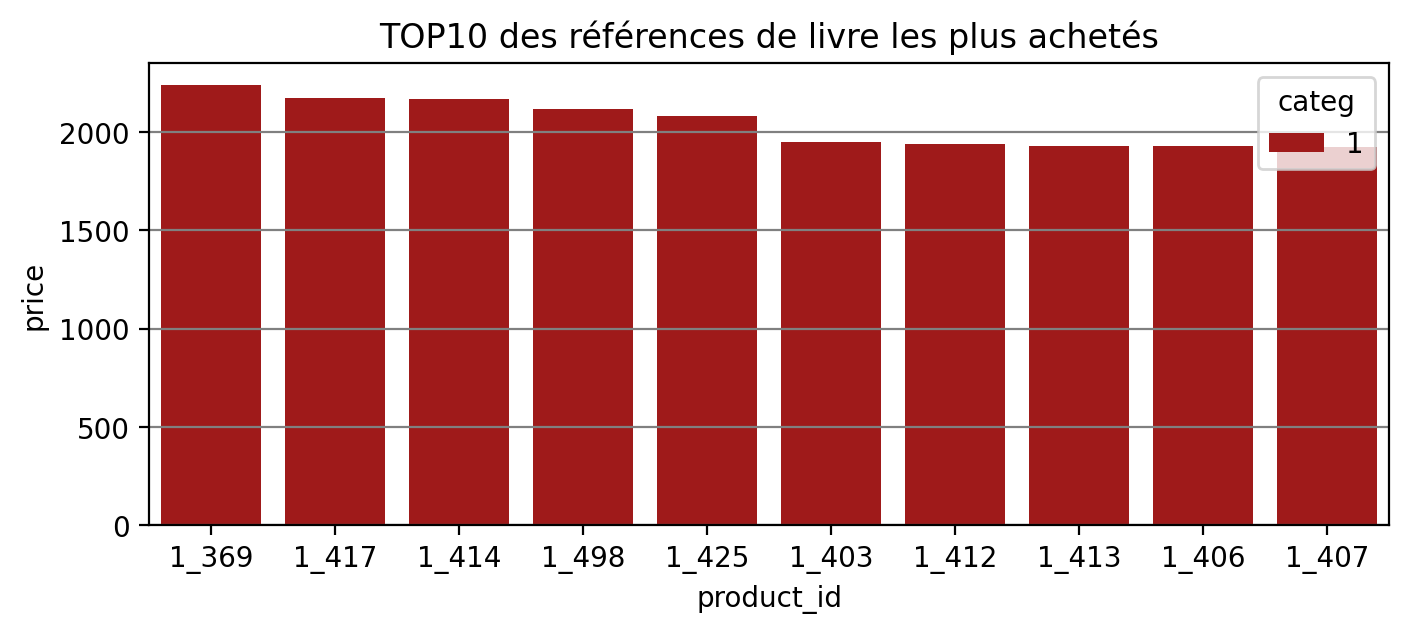

In [19]:
# TOP10 des références de livre les plus achetés en quantité.

# Création d'un df trié par produits avec le nombre de ses ventes associées.
df_reference_nb_achat = pd.DataFrame(df.groupby(by=['product_id', 'categ']).count()['price']).reset_index()
df_reference_nb_achat_TOP10 = df_reference_nb_achat.sort_values('price', ascending=False).head(10)

# Graphique: 

plt.figure(figsize=(8,3), dpi=200)
plt.grid(color='gray')
plt.title("TOP10 des références de livre les plus achetés")
plt.xlabel("livres")
plt.ylabel("nombre d'achat")
sns.barplot(data=df_reference_nb_achat_TOP10, x="product_id", y="price", hue='categ', palette=["#b50404"])

<AxesSubplot:title={'center':'TOP10 des références de livre les moins achetés'}, xlabel='product_id', ylabel='price'>

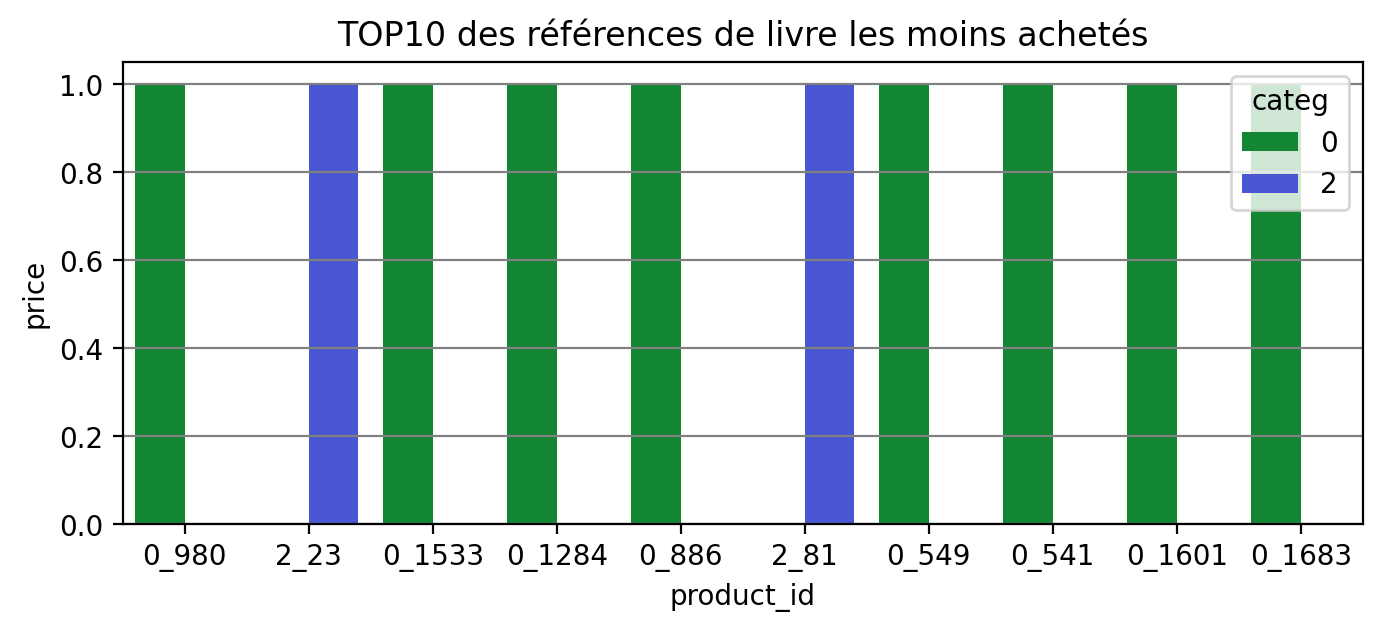

In [20]:
# FLOP10 des références de livre les plus moins achetés.

# On change l'ordre du df calculé précedemment.
df_reference_nb_achat_FLOP10 = df_reference_nb_achat.sort_values('price',ascending=True).head(10)

# Graphique: 
plt.figure(figsize=(8,3), dpi=200)
plt.grid(color='gray')
plt.title("TOP10 des références de livre les moins achetés")
plt.xlabel("livres")
plt.ylabel("nombre d'achat")

sns.barplot(data=df_reference_nb_achat_FLOP10, x="product_id", y="price", hue='categ', palette=["#00992C", "#3443eb"])

In [21]:
# Nombre des références de livre acheté une seule fois.

#df_reference_nb_achat[df_reference_nb_achat['price']<=1]
print("Il y a ", len(df_reference_nb_achat[df_reference_nb_achat['price']<=1]) ," références de livre achetés une seule fois")

Il y a  20  références de livre achetés une seule fois


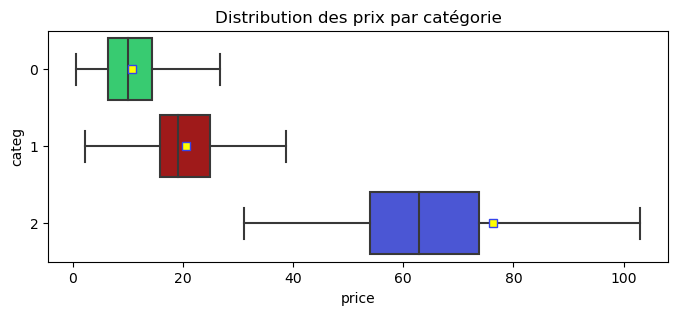

In [22]:
# Distribution des prix des livres par catégorie

# Graphique:
plt.figure(figsize=(8,3))
sns.boxplot(data=df, y='categ', x='price', orient='h', showfliers=False, showmeans=True, palette=["#20e36b", "#b50404", "#3443eb"], meanprops={"marker":"s","markerfacecolor":"yellow"})
plt.title('Distribution des prix par catégorie')
plt.show()

<h2 align="center"> <font color='#880B03'> C. Analyse des clients </font>  <h2>        

<AxesSubplot:title={'center':'TOP10 des clients dont leurs achats cumulés sont les plus élevés'}, xlabel='client_id', ylabel='price'>

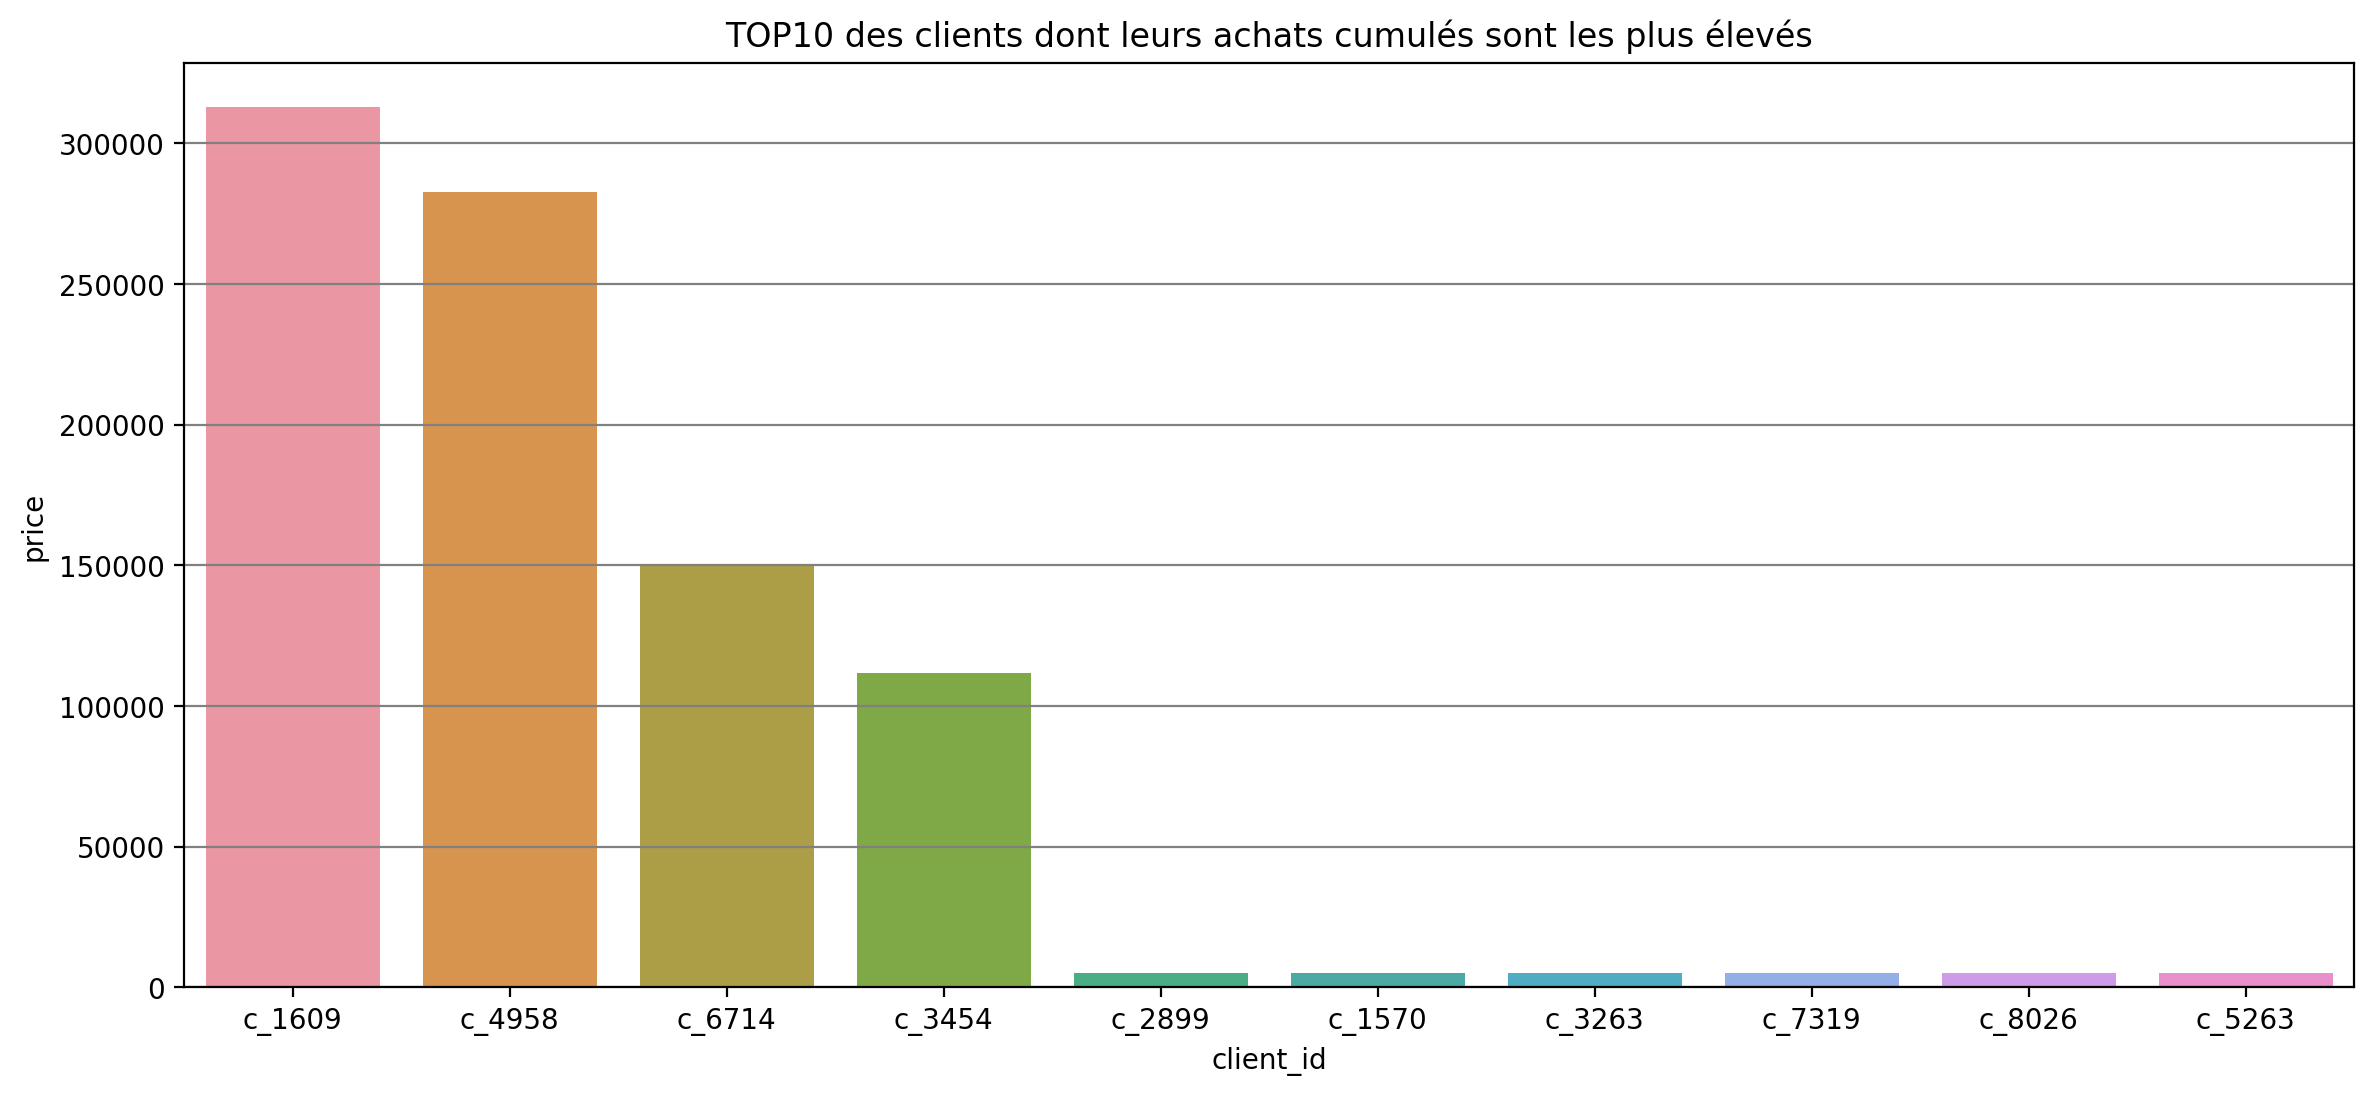

In [23]:
# TOP 10 des clients sur leur montant total des achats(achats cumulés) les plus élevés.

# Création d'un df trié par clients avec la somme des achats effectués.
df_client_ca = pd.DataFrame(df.groupby(by=['client_id']).sum()['price']).reset_index()
df_client_ca_TOP10 = df_client_ca.sort_values('price', ascending=False).head(10)

# Graphique : 
plt.figure(figsize=(14,6), dpi=200)
plt.grid(color='gray', )
plt.title("TOP10 des clients dont leurs achats cumulés sont les plus élevés")
plt.xlabel("Client")
plt.ylabel("Montant")
sns.barplot(data=df_client_ca_TOP10, x="client_id", y="price")

<AxesSubplot:title={'center':'TOP10 des clients dont leurs achats cumulés sont les plus faibles'}, xlabel='client_id', ylabel='price'>

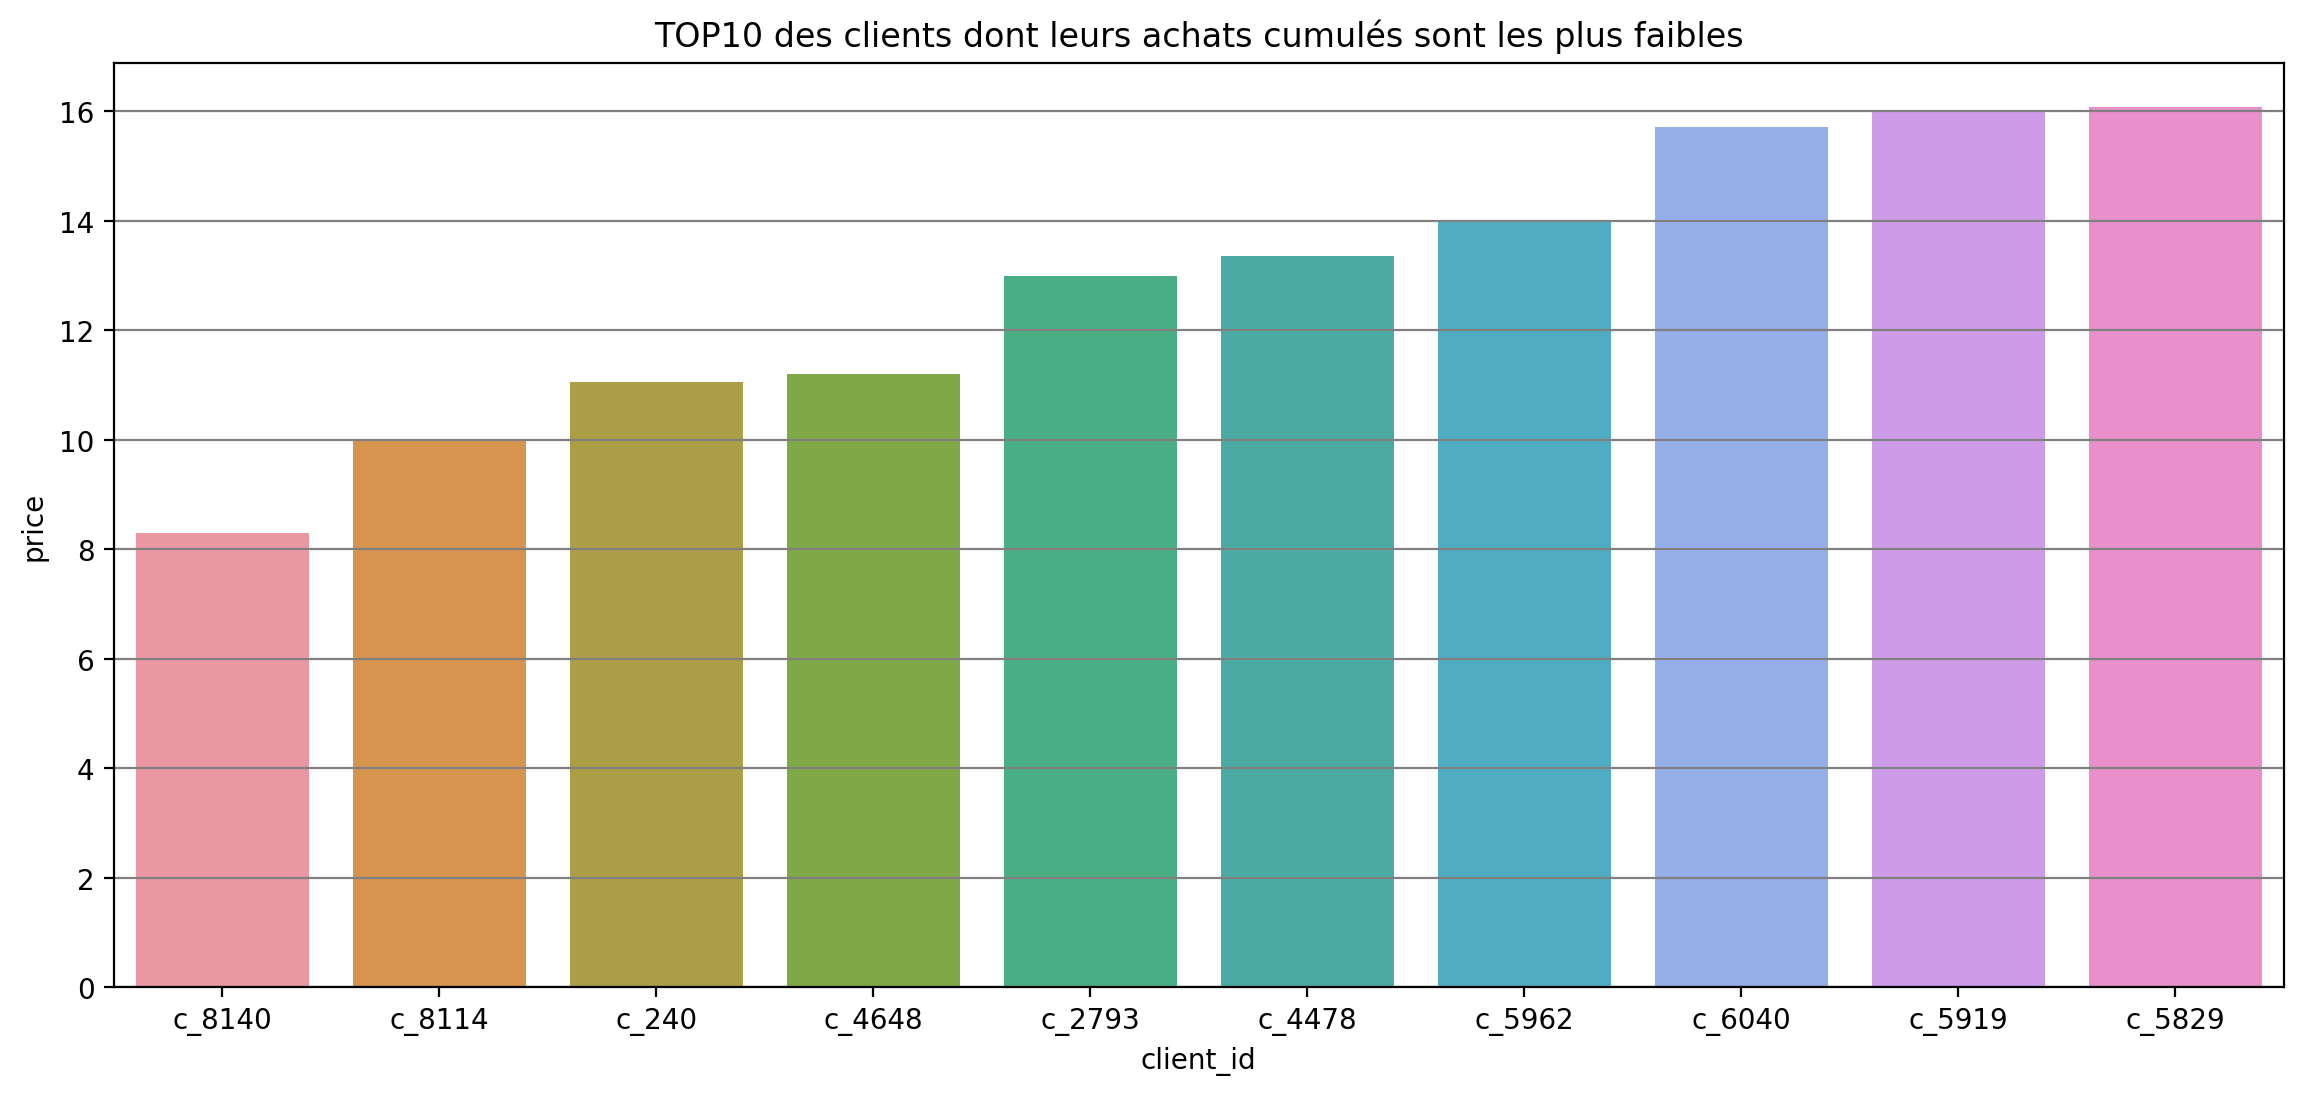

In [24]:
# TOP 10 des clients qui ont leur montant total des achats(achats cumulés) les plus faibles.

# On change l'ordre du df calculé précedemment.
df_client_ca_FLOP10 = df_client_ca.sort_values('price', ascending=True).head(10)

# Graphique :
plt.figure(figsize=(14,6), dpi=200)
plt.grid(color='gray', )
plt.title("TOP10 des clients dont leurs achats cumulés sont les plus faibles")
plt.xlabel("Client")
plt.ylabel("Montant")
sns.barplot(data=df_client_ca_FLOP10, x="client_id", y="price")

In [25]:
# Création d'une colonne Type de client (Pro = profesionnel / Par = Particulier).
df['Type_client'] = 'Par'

# Création d'une liste des clients profesionnels.
client_pro = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

# On affecte le type_client:'Pro' à tous les clients pro.
df['Type_client'][df['client_id'].isin(client_pro)] = 'Pro'

# Création de 2 df: les clients particuliers / les clients profesionnels.
df_Pro = df[df['Type_client']=='Pro']
df_Par = df[df['Type_client']=='Par']


In [26]:
# Regarde la part du CA des clients profesionnels sur le CA total.

print('Les clients professionnels représentent',round(df_Pro['price'].sum() / df['price'].sum() * 100, 2), '% du chiffre d\'affaires')

Les clients professionnels représentent 7.43 % du chiffre d'affaires


In [27]:
# Regarde la part des transactions des clients profesionnels par rapport aux transactions totales

print('Les clients professionnels représentent',round(df_Pro['price'].count() / df['price'].count() * 100, 2), '% des transactions totales')

Les clients professionnels représentent 6.86 % des transactions totales


<h2 align="center"> <font color='#880B03'> D. Analyse des inégalités de répartitions des dépenses des clients de Lapage </font>  <h2>         

In [28]:
# Création de 3 df trié par client
df_client = df.groupby(['client_id']).sum()['price'].reset_index()
df_client_par = df_Par.groupby(['client_id']).sum()['price'].reset_index()
df_client_pro = df_Pro.groupby(['client_id']).sum()['price'].reset_index()

Incide de Gini : 0.447


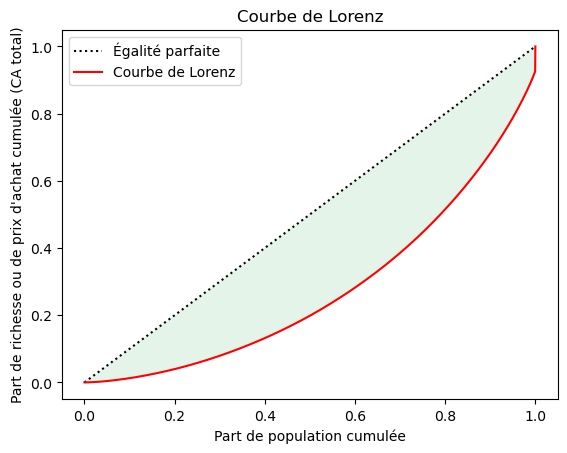

In [29]:
# Courbe de Lorenz de tous les clients:

# Trie les clients dans l'ordre decroissant de ceux qui ont le moins dépensés au total à ceux qui ont le plus dépensé.
df_client_lorenz = df_client.sort_values(by='price').reset_index(drop=True)

# Calcul:
n=len(df_client_lorenz)
cumul = np.cumsum(df_client_lorenz['price']) / np.sum(df_client_lorenz['price'])
courbe = np.concatenate([[0], cumul])

# Graphique:
plt.plot(np.linspace(0,1,n+1), np.linspace(0,1,n+1), 'k:',  label='Égalité parfaite')
plt.plot(np.linspace(0,1,n+1), courbe, 'r', label='Courbe de Lorenz')
plt.fill_between(np.linspace(0,1,n+1), np.linspace(0,1,n+1), courbe, alpha=0.1)

plt.legend(loc='upper left')
plt.xlabel('Part de population cumulée')
plt.ylabel("Part de richesse ou de prix d'achat cumulée (CA total)")
plt.title('Courbe de Lorenz')

# Indice de gini : surface entre la première bissectrice et le courbe de Lorenz
AUC = (courbe.sum() -courbe[-1]/2 -courbe[0]/2)/n 
S = 0.5 - AUC
gini = 2*S
print('Incide de Gini :', round(gini,3))

Incide de Gini : 0.404


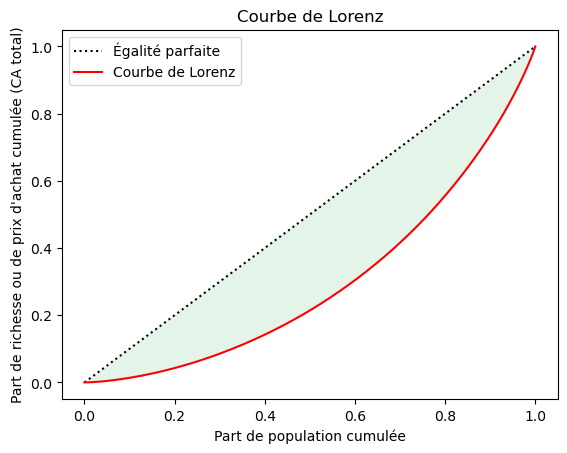

In [30]:
# Courbe de Lorenz des clients particuliers:

# Trie les clients dans l'ordre decroissant de ceux qui ont le moins dépensés au total à ceux qui ont le plus dépensé.
df_client_par_lorenz = df_client_par.sort_values(by='price').reset_index(drop=True)

# Calcul:
n=len(df_client_par_lorenz)
cumul = np.cumsum(df_client_par_lorenz['price']) / np.sum(df_client_par_lorenz['price'])
courbe = np.concatenate([[0], cumul])

# Graphique:
plt.plot(np.linspace(0,1,n+1), np.linspace(0,1,n+1), 'k:',  label='Égalité parfaite')
plt.plot(np.linspace(0,1,n+1), courbe, 'r', label='Courbe de Lorenz')
plt.fill_between(np.linspace(0,1,n+1), np.linspace(0,1,n+1), courbe, alpha=0.1)

plt.legend(loc='upper left')
plt.xlabel('Part de population cumulée')
plt.ylabel("Part de richesse ou de prix d'achat cumulée (CA total)")
plt.title('Courbe de Lorenz')


# Indice de gini : surface entre la première bissectrice et le courbe de Lorenz
AUC = (courbe.sum() -courbe[-1]/2 -courbe[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
print('Incide de Gini :', round(gini,3))

<h1 align="center"> <font color='#880B03'> III. Questions de Julie: Analyser les clients sur leurs habitudes d'achats </font>  <h1>    

 > *Nous avons déjà calculé lors de la préparation de données certains champs qui vont nous être utile pour analyser les comportements d'achats des clients : Age du client, sa fréquence d'achat, son montant total d'achat, son panier moyen ... Nous pouvons utiliser aussi les champs déjà présent comme le genre du client.*

<h2 align="center"> <font color='#880B03'> A. Lien entre le genre du client et la catégorie de livre acheté ? </font>  <h2>    

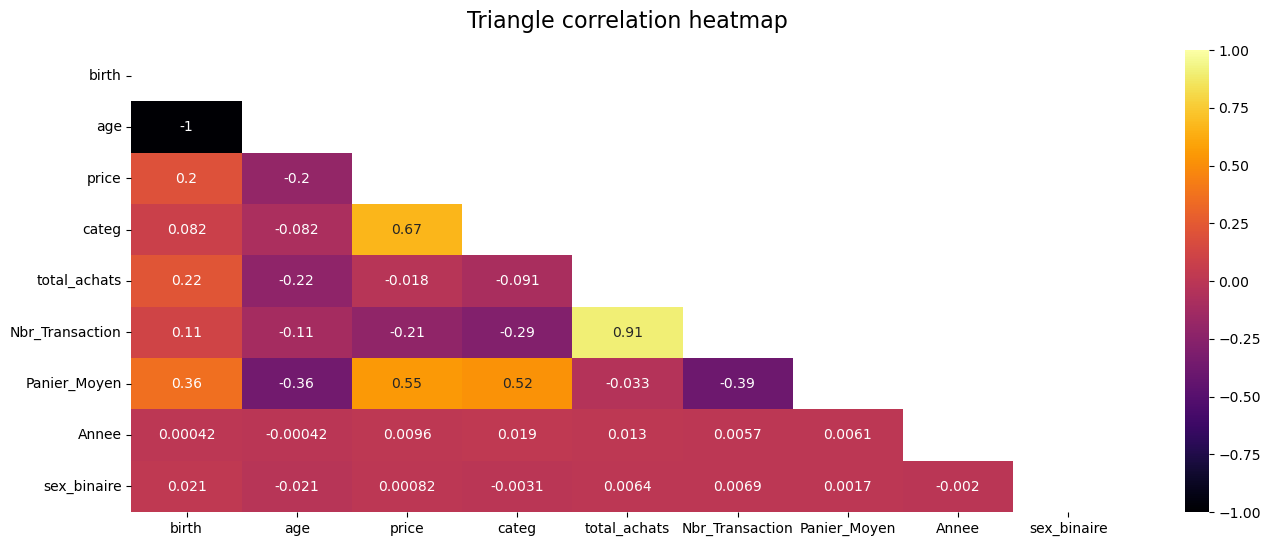

In [31]:
# Matrice de correlation.

# On doit d'abord encoder la variable 'sex' --> Rajoute une colonne sex binaire (0 ou 1).
df_Par['sex_binaire']=1
df_Par.loc[df_Par['sex']=='f', ['sex_binaire']]=0

# Graphique :
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(
    df_Par.corr(), 
    mask=np.triu(np.ones_like(df_Par.corr(), dtype=np.bool)), 
    vmin=-1, vmax=1, annot=True, cmap="inferno")
heatmap.set_title('Triangle correlation heatmap', fontdict={'fontsize':16}, pad=16)
plt.show()

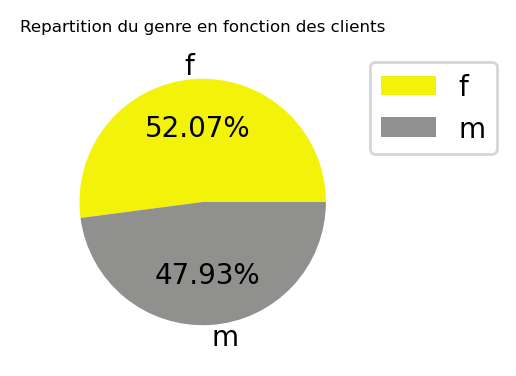

In [32]:
# La répartition du genre entre nos clients.

# Création d'un df trié par genre avec la somme de tous les clients.
df_genre_client = pd.DataFrame(df.groupby(by=['sex']).nunique()['client_id']).reset_index()

# Graphique:
plt.figure(figsize=(6,2), dpi=200)
plt.title("Repartition du genre en fonction des clients", fontdict={'fontsize':6})
plt.pie(x=df_genre_client['client_id'], labels=df_genre_client['sex'], autopct='%.2f%%', colors=["#F3F309","#90908F"])
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

In [33]:
# Création d'un df trié par clients avec son genre parmis les clients profesionnels
df_Pro.groupby(by=['client_id','sex']).sum()['price'].reset_index().head()


client_id sex      price
0    c_1609   m  312755.08
1    c_3454   m  111801.84
2    c_4958   m  282654.61
3    c_6714   f  149854.01

Text(0.5, 0, 'categ')

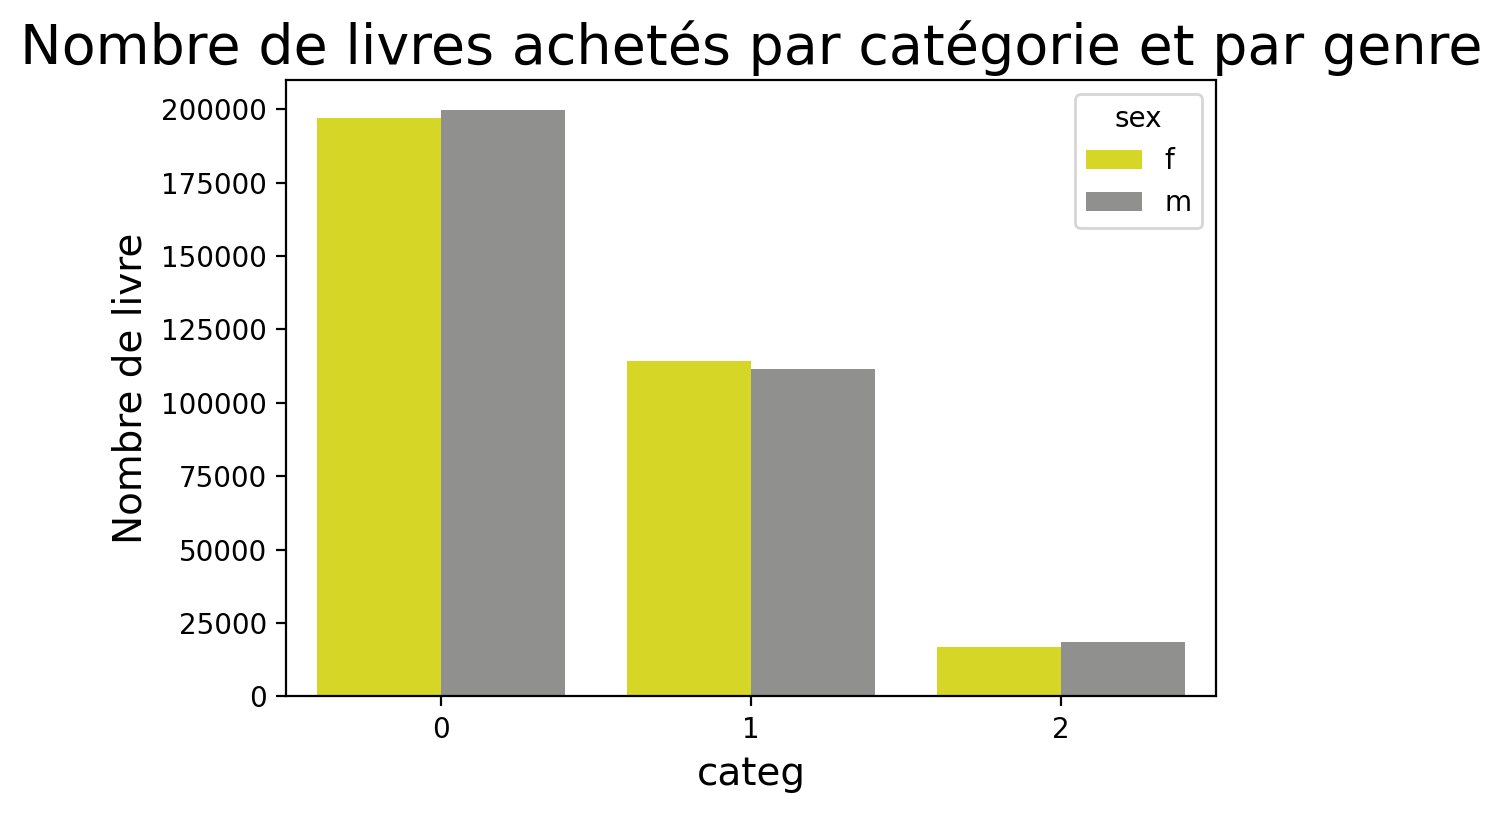

In [34]:
# Pour tous les clients.

# Création d'un df trié par genre et par catégorie avec le nombre de transactions correspondantes.
df_Par_Genre_Categ = df.groupby(['sex', 'categ']).count()['session_id'].reset_index()

#Graphique:
plt.figure(figsize=(6,4), dpi=200)
sns.barplot(data=df_Par_Genre_Categ, x='categ', y='session_id', hue='sex', palette=["#F3F309","#90908F"])
plt.title('Nombre de livres achetés par catégorie et par genre', fontsize=20)
plt.ylabel('Nombre de livre', fontsize = 14, color = 'black')
plt.xlabel("categ",fontsize = 14, color = 'black')

# df_Par_Genre_Categ.pivot(index='categ', columns='sex', values='product_id').plot(kind='bar') --> format matplot

In [35]:
# tableau de contingence du nombre de transaction par sexe et par catégorie acheté
contingence = df.pivot_table(index='categ', columns='sex', values='session_id', aggfunc=len,margins=True,margins_name="Total")
contingence.head()

sex         f       m   Total
categ                        
0      197098  199813  396911
1      114087  111416  225503
2       16722   18590   35312
Total  327907  329819  657726

                                    Pour le test du chi 2 on va avoir besoin:
- 1) du degré de liberté: ici 2 : dll = (nb ligne - 1) * (nb colonne -1) --> En effet, le chiffre obtenu a plus de chances d’être élevé à mesure que le tableau augmente… puisqu’il y aura plus de cellules dans le tableau. Cet élément doit être pris en compte pour interpréter le Chi-2.
- 2) De la valeur critique : Point limite spécifique qui détermine l'acceptation ou le rejet d'une hypothèse
- 3) De la statistique du test du chi-2
- 4) De la Pvalue pour appronfondir notre hypothèse

In [36]:
# Notre hypothèse : 
print("Notre hypothèse de départ : \n",
     "H0 : Il n'y a pas de corrélation entre le genre du client et la catégorie de livre acheté \n",
     "H1 : Il y a corrélation entre le genre du client et la catégorie de livre acheté")

Notre hypothèse de départ : 
 H0 : Il n'y a pas de corrélation entre le genre du client et la catégorie de livre acheté 
 H1 : Il y a corrélation entre le genre du client et la catégorie de livre acheté


In [37]:
from scipy import stats
from scipy.stats import chi2

# On calcul le degré de liberté:
shape = contingence.shape
lignes = shape[0] - 1 
colonnes= shape[1] - 1
dll = (lignes - 1) * (colonnes - 1)

# On calcul la valeur critique de degré de liberté 2 avec un niveau de confiance de 95%:
alpha = 0.05
ValCritique = chi2.isf(alpha,2)

# On calcul la valeur du test et la Pvalue:
chi_2_table = stats.chi2_contingency(contingence)
X2 = chi_2_table[0]
Pvalue = chi_2_table[1]

# Résultat:
print("Degré de liberté du tableau de contingence:",dll)
print("La statistique du test Chi-deux est : ", X2, "\n"
      "La p-valeur du test est : ",Pvalue, "\n")

Degré de liberté du tableau de contingence: 2
La statistique du test Chi-deux est :  143.4684942757229 
La p-valeur du test est :  1.8567023620869968e-28 



 > *Nous allons d'abord vérifier notre hypothèse de test avec la méthode traditionnelle.*

In [38]:
# Méthode traditionelle

if X2>ValCritique:
    print("Méthode traditionnelle du test du Chi-2 : \n"
         "Test statistique du Chi-2 :", X2, "> la valeur critique : ", round(ValCritique,2),"\n",
          "On rejette l'hypothèse H0")
else:
    print("Méthode traditionnelle du test du khi 2 : \n"
         "Test statistique du khi2 :", X2, "< la valeur critique : ", round(ValCritique,2),"\n",
          "On ne rejette pas l'hypothèse H0")

Méthode traditionnelle du test du Chi-2 : 
Test statistique du Chi-2 : 143.4684942757229 > la valeur critique :  5.99 
 On rejette l'hypothèse H0


 > *Puis on vérifie notre test avec la méthode de la P-value.*

In [39]:
# Méthode P-value

if Pvalue>alpha:
    print("Méthode P-value du test du khi 2 : \n"
         "La P-value de mon Test statistique du khi2 :", Pvalue, "> au niveau de confiance : ", alpha,"\n",
          "On ne rejette pas l'hypothèse H0")
else:
    print("Méthode P-value du test du khi 2 : \n"
         "La P-value de mon Test statistique du khi2 :", Pvalue, "< au niveau de confiance : ", alpha,"\n",
          "On rejette l'hypothèse H0")


Méthode P-value du test du khi 2 : 
La P-value de mon Test statistique du khi2 : 1.8567023620869968e-28 < au niveau de confiance :  0.05 
 On rejette l'hypothèse H0


<h2 align="center"> <font color='#880B03'> B. Lien entre age du client et son habitude d'achat ? </font>  <h2>     

<AxesSubplot:title={'center':'Pyramide des âges'}, xlabel='sex', ylabel='categorie_age'>

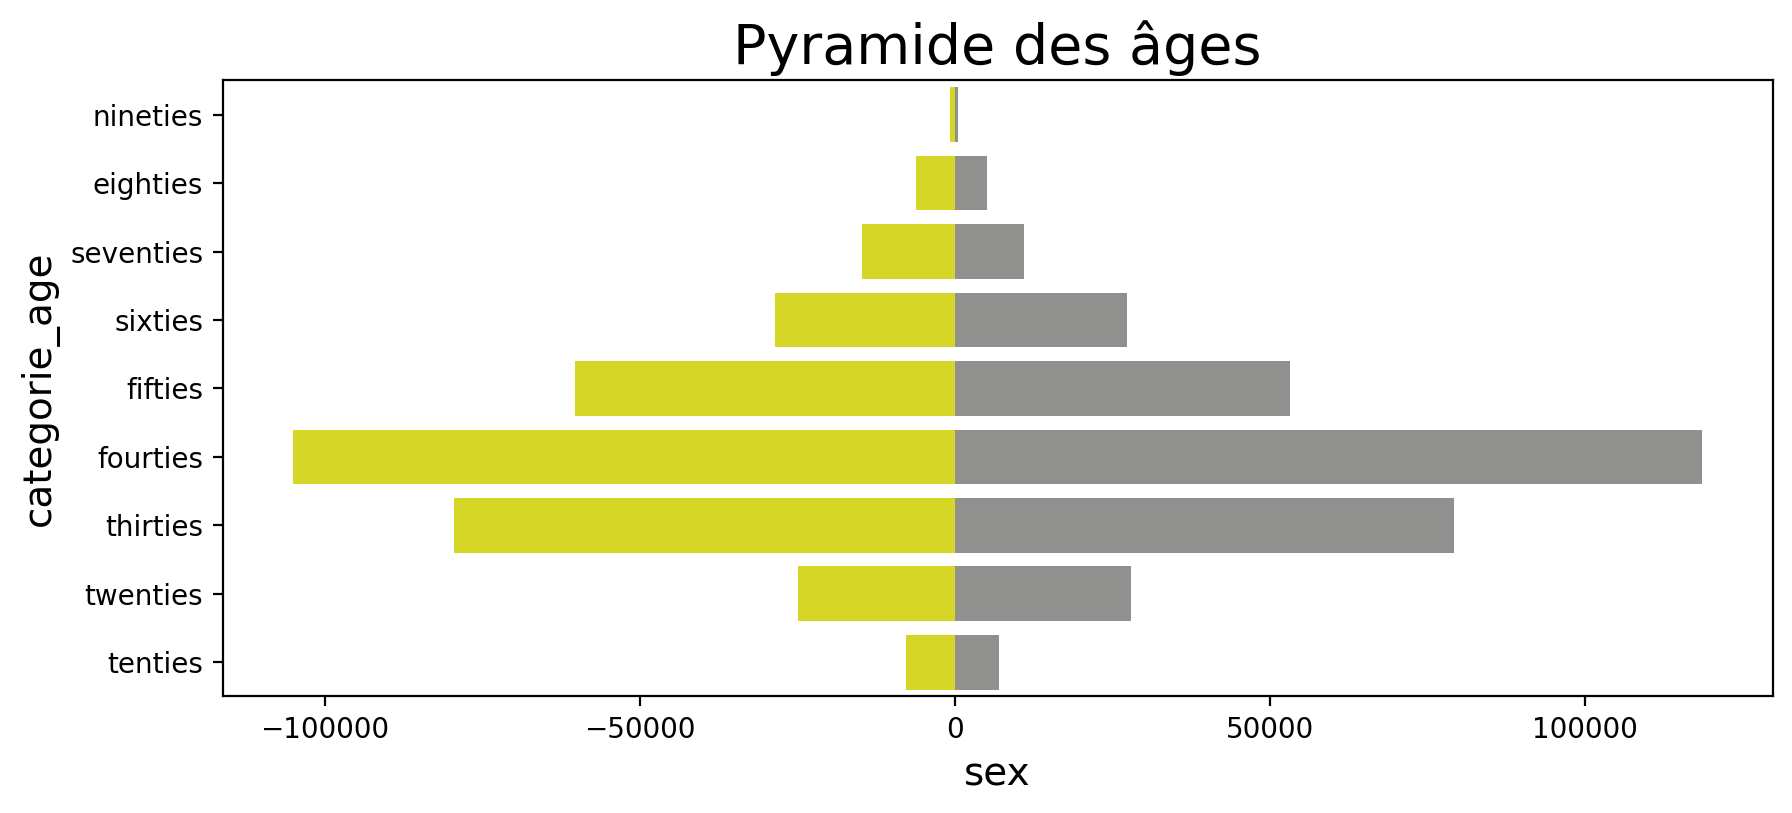

In [40]:
# Pyramide des âges.

# Changement de type du champs 'catégorie_age'.
df['categorie_age'] = df['categorie_age'].astype('category')

# Créait une liste des catégories d'âges pour les trier par ordre de grandeur.
order_list = ['nineties', 'eighties', 'seventies', 'sixties', 'fifties','fourties', 'thirties', 'twenties','tenties' ]

# Création df par categorie age pour les femmes.
client_f = df.loc[df['sex']=='f',:]
client_age_f = client_f.groupby(by='categorie_age').count()[['sex']].reset_index()
client_age_f['sex'] = client_age_f['sex']*-1

# Création df par categorie age pour les hommes.
client_m = df.loc[df['sex']=='m',:]
client_age_m = client_m.groupby(by='categorie_age').count()[['sex']].reset_index().sort_values('categorie_age', ascending=True)

# Graphique:
plt.figure(figsize=(10,4), dpi=200)
plt.title('Pyramide des âges', fontsize=20)
plt.ylabel('Age', fontsize = 14, color = 'black')
plt.xlabel("Genre",fontsize = 14, color = 'black')
sns.barplot(x=client_age_f['sex'], y=client_age_f['categorie_age'], label='femme', color= "#F3F309", errwidth=0, order=order_list)
sns.barplot(x=client_age_m['sex'], y=client_age_m['categorie_age'], label='homme', color= "#90908F", errwidth=0, order=order_list)

<h3 align="center"> <font color='#880B03'> B.1 Lien entre age du client et son montant d'achat </font>  <h3>    

<h4 align="center"> <font color='#880B03'> Client particulier : </font>  <h4>    

 > *On regarde la répartition de l'âge de nos clients.*

Text(0.5, 1.0, "Distribution de l'âge des clients")

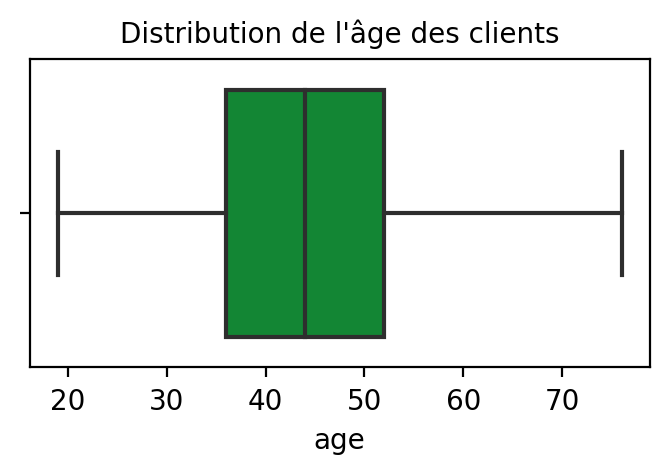

In [41]:
# Distribution des âges de tous les clients particuliers.

#Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.boxplot(data=df_Par, x='age', showfliers=False)
plt.title("Distribution de l'âge des clients", fontsize=10)

Text(0, 0.5, "Prix d'achat")

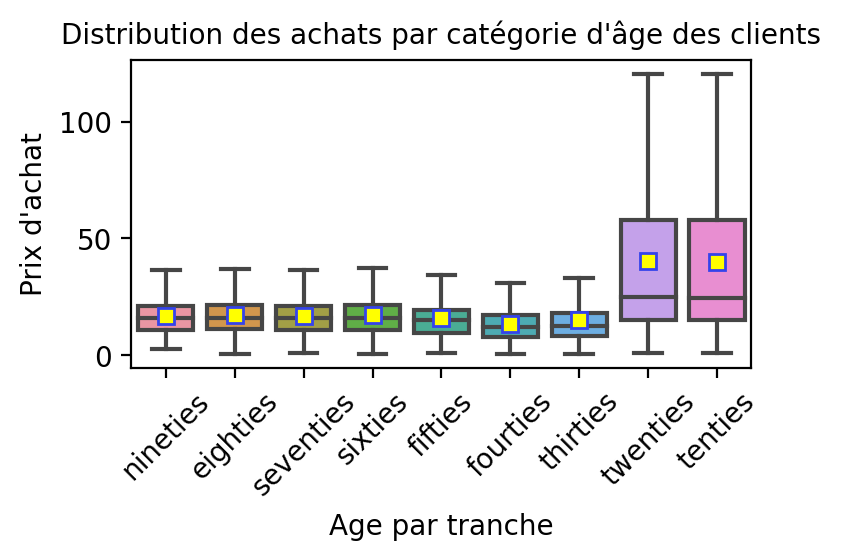

In [42]:
# Répartition des achats par catégorie d'âge des clients.

# Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.boxplot(data=df_Par, y='price', x='categorie_age', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, showfliers=False, order=order_list)
plt.title("Distribution des achats par catégorie d'âge des clients", fontsize=10)
plt.xticks(rotation=45)
plt.xlabel('Age par tranche')
plt.ylabel("Prix d'achat")

Text(0, 0.5, 'Age par tranche')

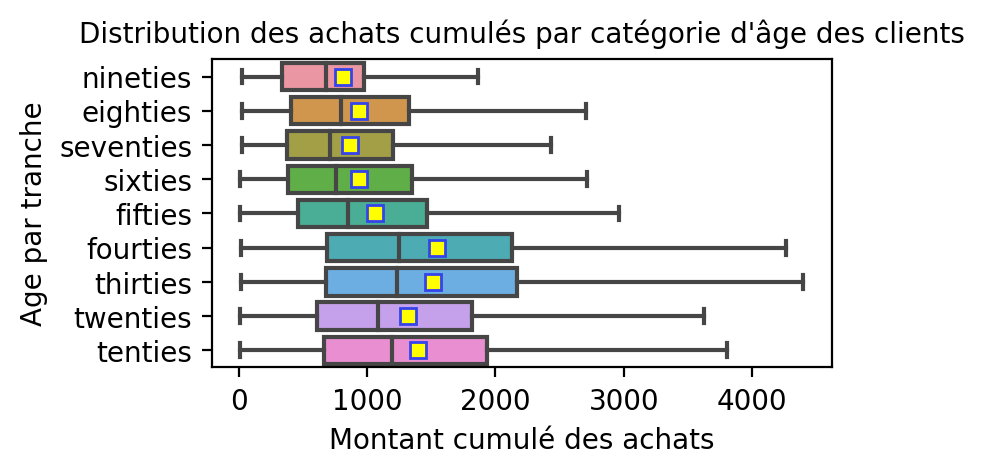

In [43]:
# Repartition des achats cumulés par catégorie d'âge des clients. 

# Création d'un df trié par client avec sa toute ses informations (age, panier moyen, total des ahats cumulés ...).
df_Par_client_age = df_Par.groupby(by=['client_id', 'categorie_age', 'age', 'total_achats', 'Panier_Moyen', 'Nbr_Transaction']).mean()['price'].reset_index()

# Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.boxplot(data=df_Par_client_age, x='total_achats', y='categorie_age', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, showfliers=False, order=order_list)
plt.title("Distribution des achats cumulés par catégorie d'âge des clients", fontsize=10)
plt.xlabel('Montant cumulé des achats')
plt.ylabel('Age par tranche')

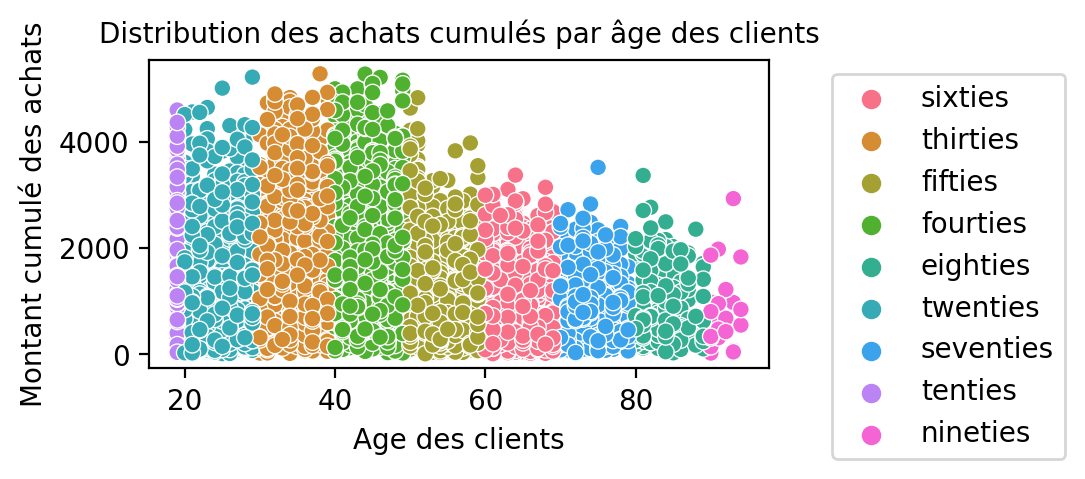

In [44]:
# Repartition des achats cumulés par catégorie d'âge des clients. 

#Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.scatterplot(data=df_Par_client_age, x='age', y='total_achats', hue='categorie_age')
plt.title("Distribution des achats cumulés par âge des clients", fontsize=10)
plt.xlabel('Age des clients')
plt.ylabel('Montant cumulé des achats')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

In [45]:
#Test de normalité de Kolmogorov-Smirnov:

from scipy.stats import kstest
from scipy.stats import norm

# Création d'une fonction qui vérifie pour une distribution et un seuil d'acceptation donné si la distribution est gausienne.
def test_normal(data,alpha):
    loc, scale = norm.fit(data)
    n = norm(loc=loc, scale=scale)
    stat, p = kstest(data, n.cdf)
    print('statistique de test:',stat,'\n','P-value:', p)
    
# On part de l'hypothèse : H0 -> la variable suit une distribution normale / H1 -> elle ne suit pas une distribution normale.
    if p > alpha:
        print('La distribution semble normale (on ne peut pas rejeter H0)')
    else:
        print('La distribution ne semble pas normale (on rejette H0)')
        
    sns.kdeplot(data, shade=True, color="purple")
    plt.show()

statistique de test: 0.1065659440218848 
 P-value: 1.9328009935020283e-85
La distribution ne semble pas normale (on rejette H0)


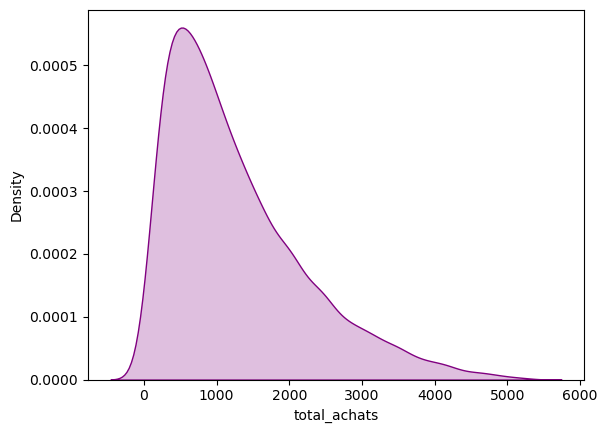

In [46]:
# Test de normalité sur le montant cumulé des achats des clients.
test_normal(df_Par_client_age['total_achats'],0.05)

statistique de test: 0.06398976638857037 
 P-value: 4.89727017225846e-31
La distribution ne semble pas normale (on rejette H0)


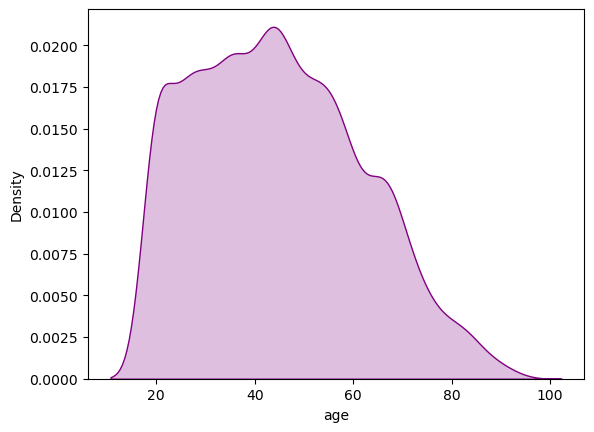

In [47]:
# Test de normalité sur le l'âge des clients.
test_normal(df_Par_client_age['age'],0.05)

In [48]:
# Test de Spearman : --> 2 variables quantitatives pour un test non paramétrique:

from scipy.stats import spearmanr

# Création d'une fonction d'un test de Spearman qui vérifier si les deux variables sont corrélées ou non.
def test_spearmanr(data1,data2,alpha):
    stat, p = spearmanr(data1, data2)
    print('statistique de Spearman :',stat,'\n', 'La valeur P:', p)

# On part de l'hypothèse : H0 -> il y a une corrélation / H1 -> il n'y a pas de corrélation.   
    if p > alpha:
        print("Il n'y a pas de corrélation entre les deux variables")
    else:
        print('Il y a une corrélation entre les deux variables')

# Test:        
test_spearmanr(df_Par_client_age['age'], df_Par_client_age['total_achats'], 0.05)        

statistique de Spearman : -0.18518100470410315 
 La valeur P: 3.660543144945314e-67
Il y a une corrélation entre les deux variables


<h4 align="center"> <font color='#880B03'> Clients profesionnels : </font>  <h4>    

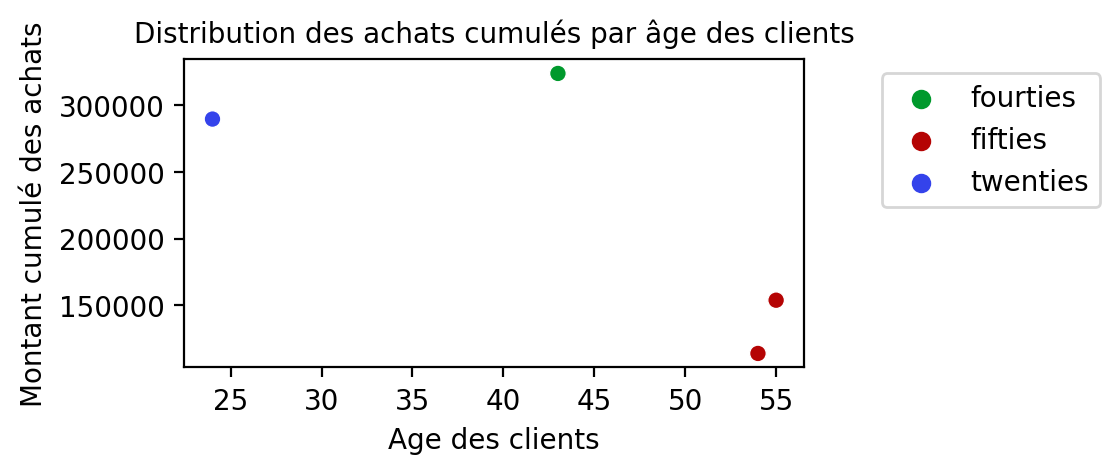

In [49]:
# Repartition des achats cumulés par catégorie d'âge des clients. 

# Création d'un df trié par client avec sa toute ses informations (age, panier moyen, total des ahats cumulés ...).
df_Pro_client_age = df_Pro.groupby(by=['client_id', 'categorie_age', 'age', 'total_achats', 'Panier_Moyen', 'Nbr_Transaction']).mean()['price'].reset_index()

# Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.scatterplot(data=df_Pro_client_age, x='age', y='total_achats', hue='categorie_age')
plt.title("Distribution des achats cumulés par âge des clients", fontsize=10)
plt.xlabel('Age des clients')
plt.ylabel('Montant cumulé des achats')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

<h3 align="center"> <font color='#880B03'> B.2 Lien entre age du client et son panier moyen </font>  <h3>       

<h4 align="center"> <font color='#880B03'> Clients particuliers : </font>  <h4>   

Text(0, 0.5, 'Age par tranche')

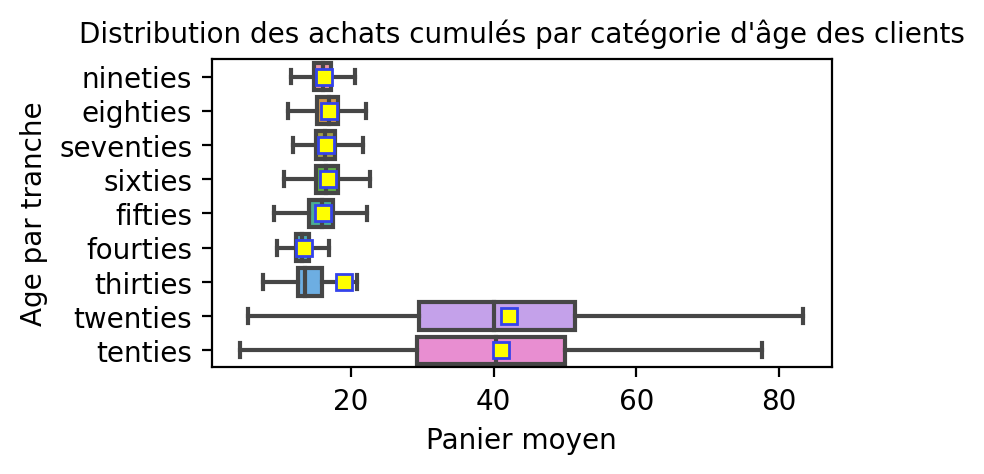

In [50]:
# Repartition des paniers moyens par catégorie d'âge des clients.

# Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.boxplot(data=df_Par_client_age, x='Panier_Moyen', y='categorie_age', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, showfliers=False, order=order_list)
plt.title("Distribution des achats cumulés par catégorie d'âge des clients", fontsize=10)
plt.xlabel('Panier moyen')
plt.ylabel('Age par tranche')

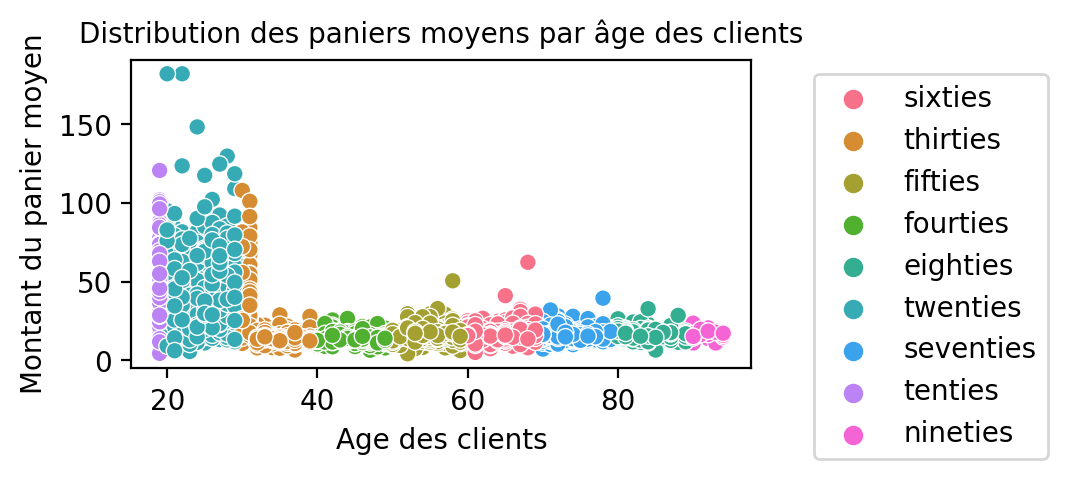

In [51]:
# Repartition des paniers moyens par catégorie d'âge des clients.
 
#Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.scatterplot(data=df_Par_client_age, x='age', y='Panier_Moyen', hue='categorie_age')
plt.title("Distribution des paniers moyens par âge des clients", fontsize=10)
plt.xlabel('Age des clients')
plt.ylabel('Montant du panier moyen')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

statistique de test: 0.2782295892277902 
 P-value: 0.0
La distribution ne semble pas normale (on rejette H0)


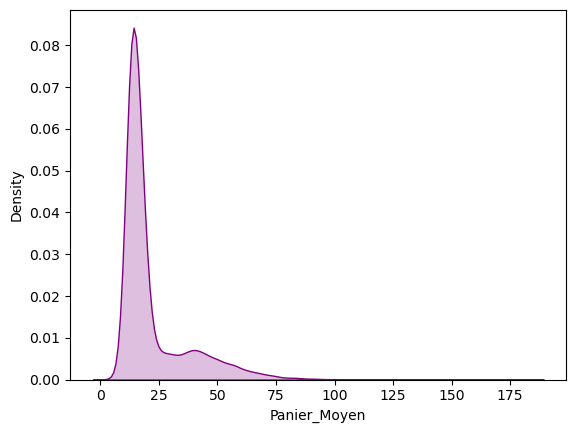

In [52]:
# Test de normalité sur le panier moyen des clients.
test_normal(df_Par_client_age['Panier_Moyen'],0.05)

In [53]:
# Test de Spearman :
test_spearmanr(df_Par_client_age['age'], df_Par_client_age['Panier_Moyen'], 0.05) 

statistique de Spearman : -0.32626487352261846 
 La valeur P: 2.6920230859484674e-212
Il y a une corrélation entre les deux variables


<h4 align="center"> <font color='#880B03'> Clients profesionnels : </font>  <h4>   

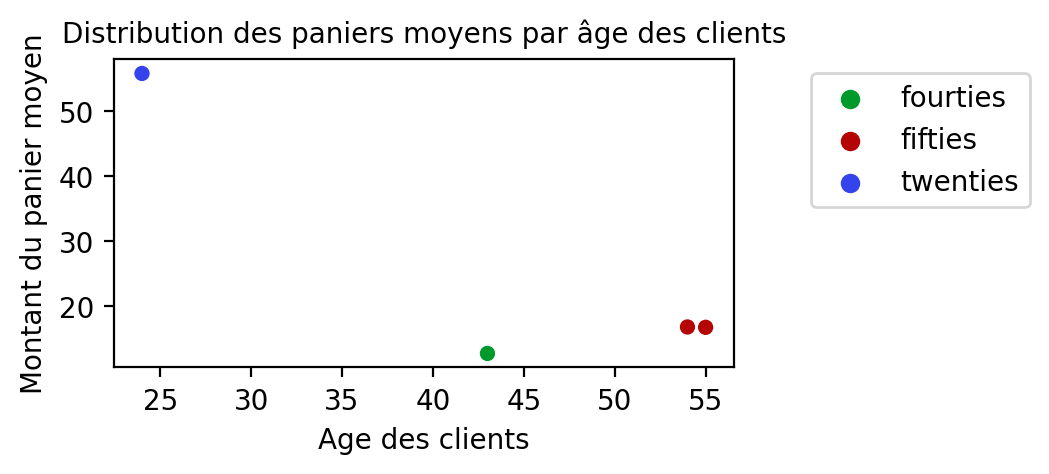

In [54]:
# Repartition des paniers moyens par catégorie d'âge des clients.
 
#Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.scatterplot(data=df_Pro_client_age, x='age', y='Panier_Moyen', hue='categorie_age')
plt.title("Distribution des paniers moyens par âge des clients", fontsize=10)
plt.xlabel('Age des clients')
plt.ylabel('Montant du panier moyen')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

<h3 align="center"> <font color='#880B03'> B.3 Lien entre age du client et sa fréquence d'achat </font>  <h3>      

<h4 align="center"> <font color='#880B03'> Clients particuliers : </font>  <h4>   

Text(0, 0.5, 'Age par tranche')

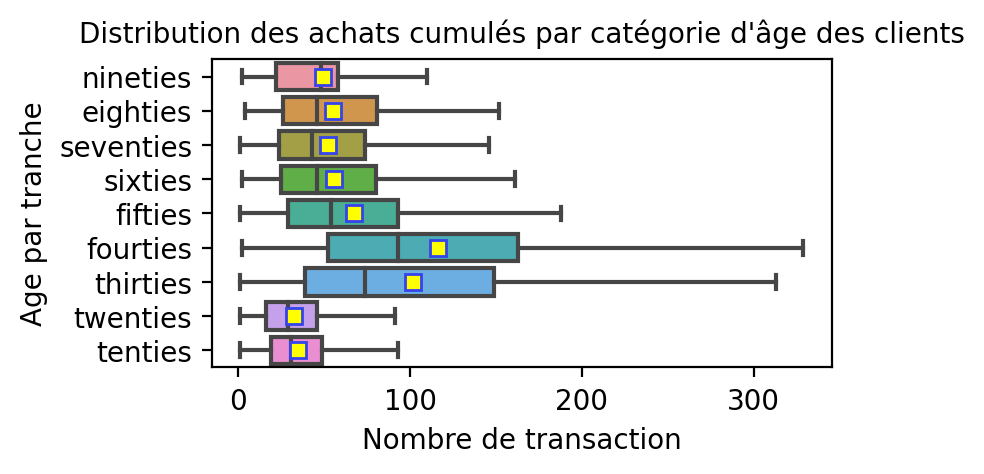

In [55]:
# Repartition du nombre de transaction par catégorie d'âge des clients. 

# Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.boxplot(data=df_Par_client_age, x='Nbr_Transaction' , y='categorie_age', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, showfliers=False, order=order_list)
plt.title("Distribution des achats cumulés par catégorie d'âge des clients", fontsize=10)
plt.xlabel('Nombre de transaction')
plt.ylabel('Age par tranche')

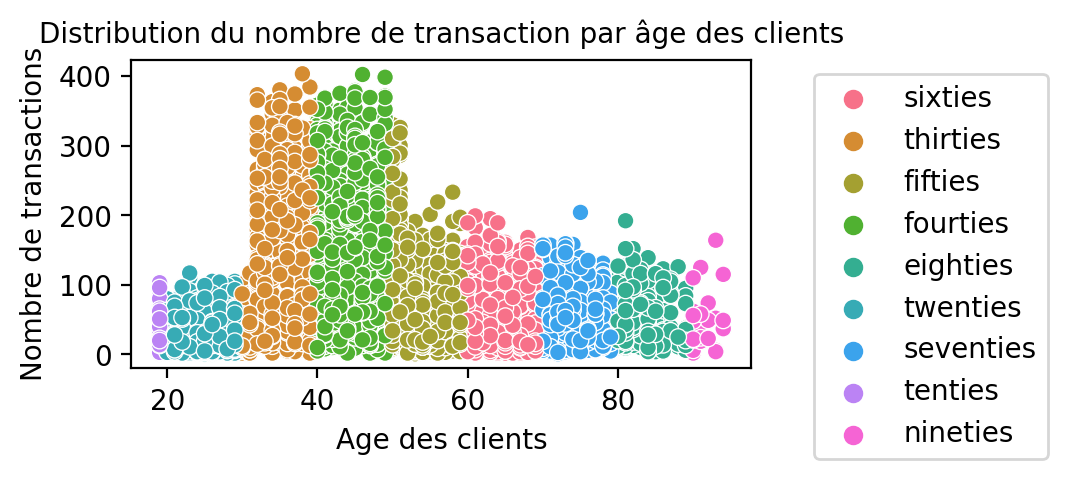

In [56]:
# Repartition des paniers moyens par catégorie d'âge des clients.
 
#Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.scatterplot(data=df_Par_client_age, x='age', y='Nbr_Transaction', hue='categorie_age')
plt.title("Distribution du nombre de transaction par âge des clients", fontsize=10)
plt.xlabel('Age des clients')
plt.ylabel('Nombre de transactions')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

statistique de test: 0.1593154724223827 
 P-value: 5.159853675352469e-191
La distribution ne semble pas normale (on rejette H0)


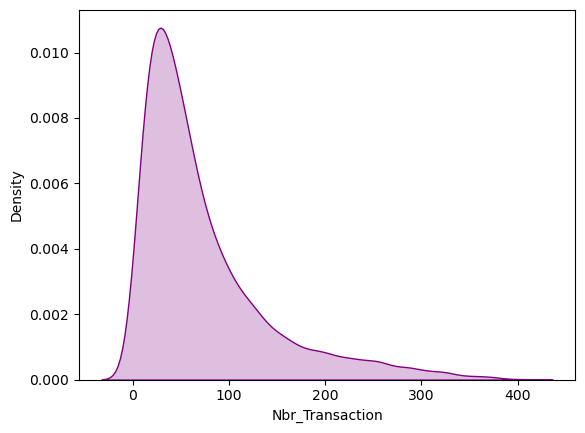

In [57]:
# Test de normalité sur le nombre de transaction passé par client :
test_normal(df_Par_client_age['Nbr_Transaction'],0.05)

In [58]:
# Test de Spearman :
test_spearmanr(df_Par_client_age['age'], df_Par_client_age['Nbr_Transaction'], 0.05) 

statistique de Spearman : 0.12832959093909316 
 La valeur P: 6.95089950004194e-33
Il y a une corrélation entre les deux variables


<h4 align="center"> <font color='#880B03'> Clients profesionnels : </font>  <h4> 

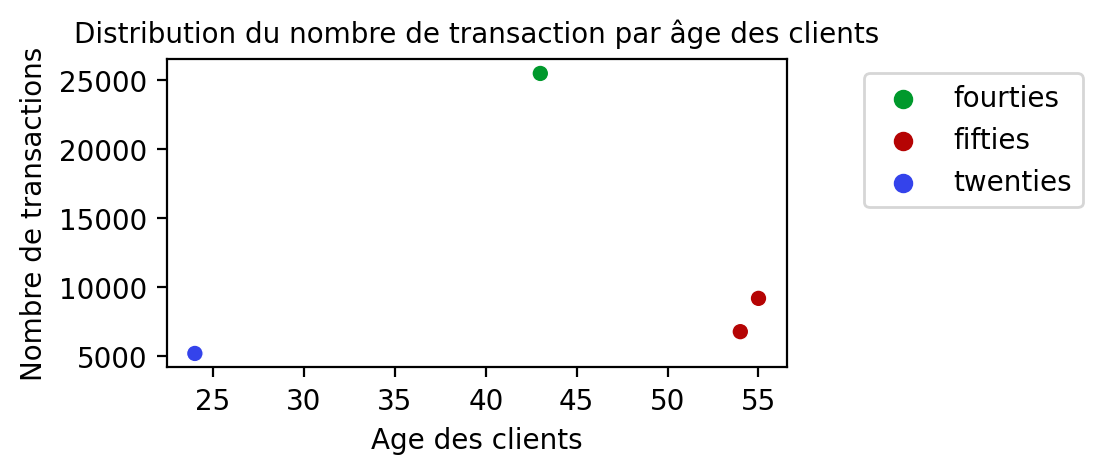

In [59]:
# Repartition des paniers moyens par catégorie d'âge des clients.
 
#Graphique:
plt.figure(figsize=(4,2), dpi=200)
sns.scatterplot(data=df_Pro_client_age, x='age', y='Nbr_Transaction', hue='categorie_age')
plt.title("Distribution du nombre de transaction par âge des clients", fontsize=10)
plt.xlabel('Age des clients')
plt.ylabel('Nombre de transactions')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

<h3 align="center"> <font color='#880B03'> B.4 Lien entre age du client et la catégorie de livre achaté </font>  <h3>      

<h4 align="center"> <font color='#880B03'> Clients particuliers : </font>  <h4> 

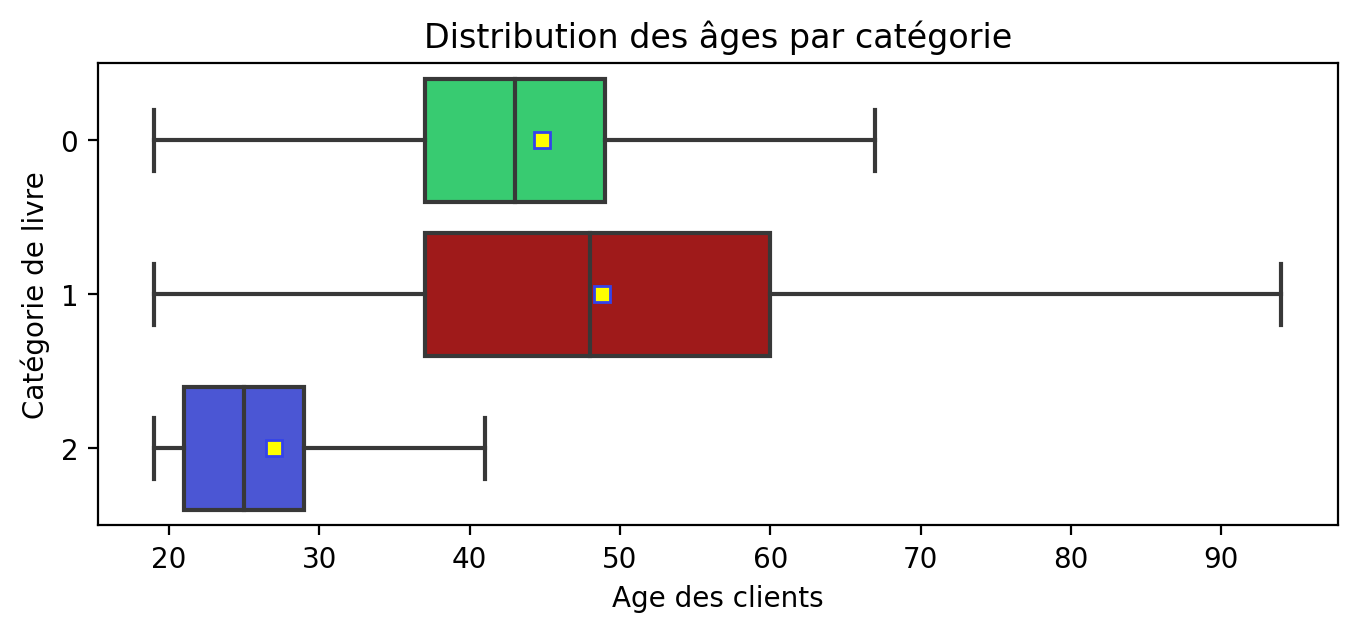

In [60]:
# Repartition des âges des clients par catégorie de livre consommé.

# Graphique : 
plt.figure(figsize=(8,3), dpi=200)
sns.boxplot(data=df_Par, y='categ', x='age', orient='h', showfliers=False, showmeans=True, palette=["#20e36b", "#b50404", "#3443eb"], meanprops={"marker":"s","markerfacecolor":"yellow"})
plt.title('Distribution des âges par catégorie')
plt.xlabel('Age des clients')
plt.ylabel('Catégorie de livre')
plt.show()

In [61]:
# Création de 3 listes avec pour chacunes l'age des clients liés à une catégorie en particulier.
Part_0 = df_Par['age'].loc[df_Par['categ']==0].to_list()
Part_1 = df_Par['age'].loc[df_Par['categ']==1].to_list()
Part_2 = df_Par['age'].loc[df_Par['categ']==2].to_list()

In [62]:
# Test de Kruskall Wallis:
from scipy.stats import kruskal
stats, p= kruskal(Part_0,Part_1,Part_2)

print('statistique de Kruskal Wallis :',stats,'\n', 'La valeur P:', p)
if p > alpha:
        print("Au seuil α de 5%, on ne peut pas rejetter H0, les différences entre les médianes ne sont pas statistiquement significatives.")
else:
        print("Au seuil α de 5%,, on rejette l'hypothèse H0, les différences entre les médianes sont significatives.")
         

statistique de Kruskal Wallis : 69911.21351199699 
 La valeur P: 0.0
Au seuil α de 5%,, on rejette l'hypothèse H0, les différences entre les médianes sont significatives.


<h4 align="center"> <font color='#880B03'> Clients profesionnels : </font>  <h4> 

Text(0.5, 0, 'Age des clients')

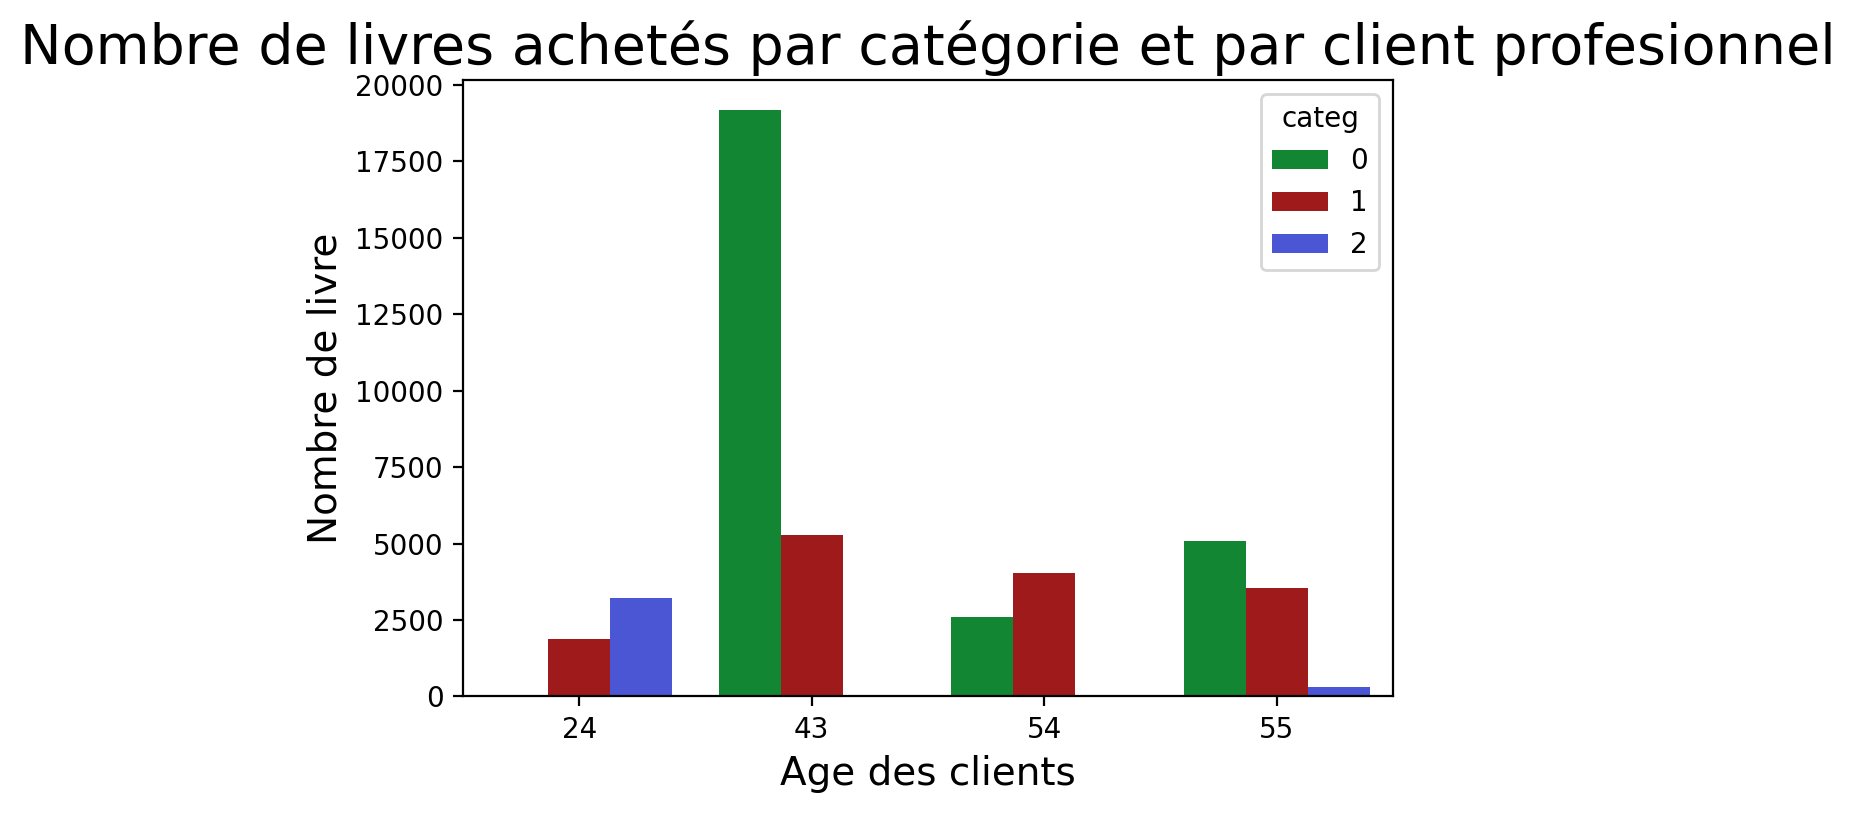

In [63]:
# Nombre de livres achetés par catégorie et par âge des clients profesionnels:

# Création d'un df trié par client professionnel et par catégorie avec le nombre de transactions correspondantes.
df_Par_client_Categ = df_Pro.groupby(['age', 'categ']).count()['session_id'].reset_index()

#Graphique:
plt.figure(figsize=(6,4), dpi=200)
sns.barplot(data=df_Par_client_Categ, x='age', y='session_id', hue='categ')
plt.title('Nombre de livres achetés par catégorie et par client profesionnel', fontsize=20)
plt.ylabel('Nombre de livre', fontsize = 14, color = 'black')
plt.xlabel("Age des clients",fontsize = 14, color = 'black')


In [64]:
# Récupère juste l'age des clients profesionnels pour savoir à quelle client correspond l'âge.
df_Pro_Client_Age = df_Pro.groupby(['client_id']).max()['age'].reset_index()
df_Pro_Client_Age

client_id  age
0    c_1609   43
1    c_3454   54
2    c_4958   24
3    c_6714   55

<h1 align="center"> <font color='#880B03'>IV. Annexes </font>  <h1>

                        Annexe avec toutes les références utiles à l'élaboration de ces analyses:

- Anova / kruskall Wallis : 
    - https://www.alliage-ad.com/data-science/comment-etudier-la-liaison-entre-une-variable-quantitative-et-une-variable-qualitative/
    - https://ultv.univ-lorraine.fr/video/12867-10-3-le-test-de-kruskal-wallis-a-kimmounmp4/

- Chi-2 : 
    - https://support.minitab.com/fr-fr/minitab/20/help-and-how-to/statistics/tables/how-to/chi-square-test-for-association/interpret-the-results/key-results/
    - https://www.jmp.com/fr_fr/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html

- Les tests de normalité : 
    - https://epirheum.com/comment-savoir-si-mes-donnees-suivent-une-distributionnormale/#:~:text=Comme%20d'autres%20tests%2C%20ce,la%20distribution%20est%20non%20gaussienne.

- Arbre de décision : 
    - https://statinferentielle.fr/choix-test-statistique/?fbclid=IwAR31JXSD_EUKfvhQNxgTe9m1L7LP3CcDO395RGF9JRLX9seMVHc4y-7P864

- Création de mon champ "categorie_age" : basé sur des études de l'INSEE.